<a href="https://colab.research.google.com/github/nicolasero87/Homicidios_dolosos_Argentina/blob/main/1_Proyecto_Final_Ds2_Nicolas_Roman_Homicidios_en_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

#Proyecto Final
#**Fundamento Ciencias de datos II**

---


###Alumno: Nicolas Román
####Comision 61785

###Prof.: David Silvera
###Tutor: Guillermo Mallo


#####Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://www.argentina.gob.ar/seguridad/estadisticascriminales/bases-de-datos)

#####Data Base:  [Sistema de Alerta Temprana Homicidios Dolosos 2017-2023](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

#####Abril 2025


#Consigna


---


##Para el Primer Entregable
####Objetivos generales

Obtener datos de diversas fuentes como APIs o Bases de datos públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar una pregunta de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos

####Objetivos específicos

Estructurar un problema en función de múltiples pero simples preguntas/hipótesis a responder

Importar datos crudos de APIs o bases de datos usando Python

Limpiar y transformar los datos para permitir un posterior análisis

Contar una historia mediante el análisis exploratorio de datos

---


## Requisitos Base

* Un notebook (Colab o Jupyter) que debe contener:
1.Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podrá beneficiar de este análisis

2.Preguntas/hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos. Bloques de código donde se importan los datos desde una API o base de datos pública y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de código

3.Análisis exploratorio de datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas
Formato:

* Una presentación (PDF; PowerPoint o Google Slides) que debe contener

1.Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podrá beneficiar de este análisis

2.Resumen de metadata: resumen de los datos a ser analizados es decir, número de filas/columnas, tipos de variables, etc

3.Preguntas hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos

4.Visualizaciones ejecutivas que responden nuestras preguntas: utilización de gráficos que responden las preguntas de interés de nuestro proyecto.

5.Insights: resumen de hallazgos del proyecto. Aquí consolidamos las respuestas a las preguntas/hipótesis que fuimos contestando con las visualizaciones

##Requisitos extra

* Subir el proyecto a Github

#Importacion de librerias y conexión a la carpeta de GitHub

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bokeh.io import output_notebook, show, reset_output
from bokeh.plotting import figure
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
! git clone https://github.com/nicolasero87/Homicidios_dolosos_Argentina.git

Cloning into 'Homicidios_dolosos_Argentina'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 19.48 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (17/17), done.


# Data Set: *Sistema de Alerta Temprana- Homicicios Dolosos- Argentina 2017-2023*

##Abstracto
documento: **SAT-HD-BU_2017-2023**. El mismo fue importado en formato *.csv

Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://datos.gob.ar/apis)

Data Base:  [Sist. Al. temp. Homicidios Dolosos](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

El Ministerio de Seguridad de la Nación, a través de la Dirección Nacional de Estadística Criminal, pone a disposición los registros administrativos del Sistema de Alerta Temprana de Homicidios Dolosos (en adelante, SAT-HD) del Sistema Nacional de Información Criminal (SNIC).

De esta forma, a partir de la difusión y la mejora en el acceso a la información sobre la temática, se busca promover el desarrollo de nuevas investigaciones y contribuir al diseño de políticas públicas basadas en evidencia, además de promover la transparencia en la gestión, acorde a la Ley Nro. 27.275 de Derecho de Acceso a la Información Pública y Gobierno Abierto.

A partir de los microdatos de las bases SAT-HD es posible calcular la cantidad de víctimas y hechos de homicidios dolosos, identificar las características y los modos en los que suceden los hechos; así también releva información sobre las características de víctimas e inculpados/as. La base permite también identificar el vínculo entre víctima y victimario, conocer el contexto en el que sucede el hecho, entre otra información relevante.

La base de datos cuenta con un número identificador por cada hecho. En la misma base se incluyen los registros correspondientes a todas las víctimas y a todos los inculpados identificados en cada hecho.

La base de datos cuenta con un identificador del hecho, para cada uno de ellos se encuentran en la misma base los registros correspondientes a las víctimas y a los inculpados (uno/a por fila). Por lo tanto, las características de un mismo hecho se repiten para cada víctima y cada inculpado/a. Para calcular la cantidad de víctimas es necesario filtrar a los inculpados de la base de datos, es posible contabilizar la cantidad de víctimas e inculpados utilizando la variable “tipo_persona”.

El data set elegido se trata de un conjunto de datos (instancias) de 34.033 registros.
Cada homicidio (hecho) esta asociado a un ID el que se repite segun la dimension del análisis (victima o autor del homicidio).


# OBJETIVOS

El presente proyecto tiene 2 objetivos:

1.  **Objetivo n° 1**: Analizar la base de Datos mediante un EDA. (primera parte del notebook)

2.   **Objetivo n° 2**: Intentar crear un algoritmo que analice la correlacion entre las variables 'en_ocasion_otro_delito', y 'victima_relacion_inculpado' (segunda parte del notebook).

## Importación de los datos


In [3]:
#print(response.text[:500])  # Muestra los primeros 500 caracteres

In [4]:
import pandas as pd
import io
import requests

# Replace 'your_file_id' with the actual file ID from the Google Drive link
file_id = '1ugAXNrEZhNlIwjoziVrRrKY8_wxjGtCT'
url = f'https://docs.google.com/uc?export=download&id={file_id}'

# Download the CSV data
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text), sep=';')

<ipython-input-4-2d3b4d099594>:14: DtypeWarning: Columns (11,21,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text), sep=';')


## Verificacion de datos


In [5]:
#impresion de las primeras 5 filas del data set
df.head()

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inc,cant_vic,federal,provincia_id,provincia_nombre,departamento_id,...,victi_situacion_ocupacional_otro,victima_relacion_inculpado,inculpado_sexo,inculpado_identidad_genero,inculpado_identidad_genero_otro,inculpado_tr_edad,inculpado_18_años_o_mas,inculpado_clase,inculpado_otro_clase,inculpado_relacion_victima
0,11535,HD Varón,Víctima idRegistro 12235,Víctima,3,1,No,58,Neuquén,58035,...,NaN,Sin relación,No corresponde,No corresponde,-------,No corresponde,No corresponde,No corresponde,----,No corresponde
1,11535,HD Varón,Imputado idRegistro 12929,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
2,11535,HD Varón,Imputado idRegistro 12931,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
3,11535,HD Varón,Imputado idRegistro 12930,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
4,11536,HD Varón,Imputado idRegistro 12933,Imputado,2,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,20-24,Sí,Civil,NaN,Sin relación


In [6]:
#Veamos las 5 ultimas filas
df.tail()

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inc,cant_vic,federal,provincia_id,provincia_nombre,departamento_id,...,victi_situacion_ocupacional_otro,victima_relacion_inculpado,inculpado_sexo,inculpado_identidad_genero,inculpado_identidad_genero_otro,inculpado_tr_edad,inculpado_18_años_o_mas,inculpado_clase,inculpado_otro_clase,inculpado_relacion_victima
34027,33823,HD Varón,Imputado idRegistro 40841,Imputado,2,1,No,6,Buenos Aires,6371,...,No corresponde,No corresponde,Masculino,Varón,NaN,15-19,Sí,Civil,NaN,Sin relación
34028,33827,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 36001,Víctima,1,1,No,90,Tucumán,90084,...,NaN,Conyuge/ pareja,No corresponde,No corresponde,NaN,No corresponde,No corresponde,No corresponde,----,No corresponde
34029,33827,HD Mujer Cis Trans Travesti-Femicidio,Imputado idRegistro 40845,Imputado,1,1,No,90,Tucumán,90084,...,No corresponde,No corresponde,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,No corresponde
34030,33828,HD Mujer Cis Trans Travesti-Femicidio,Imputado idRegistro 40846,Imputado,1,1,No,90,Tucumán,90084,...,No corresponde,No corresponde,Masculino,Varón,NaN,Sin determinar,Sí,Civil,NaN,No corresponde
34031,33828,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 36002,Víctima,1,1,No,90,Tucumán,90084,...,NaN,Conyuge/ pareja,No corresponde,No corresponde,NaN,No corresponde,No corresponde,No corresponde,----,No corresponde


In [7]:
#dimensión del data set para saber si cumple con los requisitos exigidos
df.shape


(34032, 47)

In [8]:
#Nombre de los atributos
print(df.columns)

Index(['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id',
       'tipo_persona', 'cant_inc', 'cant_vic', 'federal', 'provincia_id',
       'provincia_nombre', 'departamento_id', 'departamento_nombre',
       'localidad_id', 'localidad_nombre', 'radio_censal', 'latitud_radio',
       'longitud_radio', 'anio', 'mes', 'fecha_hecho', 'hora_hecho',
       'tipo_lugar', 'tipo_lugar_otro', 'tipo_lugar_ampliado', 'clase_arma',
       'clase_arma_otro', 'en_ocasion_otro_delito',
       'en_ocasion_otro_delito_otro', 'motivo_origen_registro',
       'motivo_origen_registro_otro', 'victima_sexo',
       'victima_identidad_genero', 'victima_identidad_genero_otro',
       'victima_tr_edad', 'victima_18_años_o_mas', 'victima_clase',
       'victima_clase_otro', 'victima_situacion_ocupacional',
       'victi_situacion_ocupacional_otro', 'victima_relacion_inculpado',
       'inculpado_sexo', 'inculpado_identidad_genero',
       'inculpado_identidad_genero_otro', 'inculpado_tr_edad',
       'in

para hacer un repaso del contenido de cada uno de los atributos ver el [Manual Usuario Base Sistema Alerta
Temprana de Homicidios](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/Manual%20de%20usuario%20Base%20SAT-HD_2024.pdf)


In [9]:
df.count()

,0
id_hecho,34032
tipo_hecho_segun_victima,34032
tipo_persona_id,34032
tipo_persona,34032
cant_inc,34032
cant_vic,34032
federal,34032
provincia_id,34032
provincia_nombre,34032
departamento_id,34032


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34032 entries, 0 to 34031
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_hecho                          34032 non-null  int64  
 1   tipo_hecho_segun_victima          34032 non-null  object 
 2   tipo_persona_id                   34032 non-null  object 
 3   tipo_persona                      34032 non-null  object 
 4   cant_inc                          34032 non-null  int64  
 5   cant_vic                          34032 non-null  int64  
 6   federal                           34032 non-null  object 
 7   provincia_id                      34032 non-null  int64  
 8   provincia_nombre                  34032 non-null  object 
 9   departamento_id                   34032 non-null  int64  
 10  departamento_nombre               34032 non-null  object 
 11  localidad_id                      34032 non-null  object 
 12  loca

In [11]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df.describe().T.applymap(lambda x: f'{x:.2f}')

<ipython-input-11-eff3406d9fd6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().T.applymap(lambda x: f'{x:.2f}')


,count,mean,std,min,25%,50%,75%,max
id_hecho,34032.00,22653.28,6212.75,11535.00,17584.75,22559.50,27930.00,33828.00
cant_inc,34032.00,1.45,1.08,1.00,1.00,1.00,1.00,16.00
cant_vic,34032.00,1.06,0.32,1.00,1.00,1.00,1.00,6.00
provincia_id,34032.00,34.27,32.77,2.00,6.00,14.00,66.00,94.00
departamento_id,34032.00,34642.65,38508.90,2001.00,6427.00,14147.00,66126.00,2699926.00
radio_censal,29118.00,344217885.92,320451362.51,20010101.00,64279615.00,180210701.00,661260204.00,940140810.00
anio,34032.00,2019.92,1.96,2017.00,2018.00,2020.00,2022.00,2023.00
mes,34032.00,6.46,3.56,1.00,3.00,6.00,10.00,12.00


In [12]:
df.describe(include='object').T

,count,unique,top,freq
tipo_hecho_segun_victima,34032,9,HD Varón,28222
tipo_persona_id,34032,34032,Víctima idRegistro 35945,1
tipo_persona,34032,2,Imputado,18510
federal,34032,2,No,34019
provincia_nombre,34032,24,Buenos Aires,13680
departamento_nombre,34032,396,Capital,3110
localidad_id,34032,104,10,8734
localidad_nombre,34032,1054,Rosario,2561
latitud_radio,29118,9156,"-32,9611241",50
longitud_radio,29118,9147,"-60,7406953",50


La descripción anterior nos anticipa que Buenos Aires es la provincia más repetida entre los hechos del data set.

In [13]:
columnas = df.columns.tolist()  # Convertir a una lista para una mejor visualización
print(columnas)

['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id', 'tipo_persona', 'cant_inc', 'cant_vic', 'federal', 'provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'localidad_id', 'localidad_nombre', 'radio_censal', 'latitud_radio', 'longitud_radio', 'anio', 'mes', 'fecha_hecho', 'hora_hecho', 'tipo_lugar', 'tipo_lugar_otro', 'tipo_lugar_ampliado', 'clase_arma', 'clase_arma_otro', 'en_ocasion_otro_delito', 'en_ocasion_otro_delito_otro', 'motivo_origen_registro', 'motivo_origen_registro_otro', 'victima_sexo', 'victima_identidad_genero', 'victima_identidad_genero_otro', 'victima_tr_edad', 'victima_18_años_o_mas', 'victima_clase', 'victima_clase_otro', 'victima_situacion_ocupacional', 'victi_situacion_ocupacional_otro', 'victima_relacion_inculpado', 'inculpado_sexo', 'inculpado_identidad_genero', 'inculpado_identidad_genero_otro', 'inculpado_tr_edad', 'inculpado_18_años_o_mas', 'inculpado_clase', 'inculpado_otro_clase', 'inculpado_relacion_victima']


In [14]:
#Tipo de dato para cada columna
df.dtypes

,0
id_hecho,int64
tipo_hecho_segun_victima,object
tipo_persona_id,object
tipo_persona,object
cant_inc,int64
cant_vic,int64
federal,object
provincia_id,int64
provincia_nombre,object
departamento_id,int64


In [15]:
#Identificar valores perdidos.
df.isnull().sum()

,0
id_hecho,0
tipo_hecho_segun_victima,0
tipo_persona_id,0
tipo_persona,0
cant_inc,0
cant_vic,0
federal,0
provincia_id,0
provincia_nombre,0
departamento_id,0


El resultado anterior es muy importante porque nos dice dónde hay valores nulos. Lo importante es indagar si los mismos aparecen dentro de atributos que serán objeto de análisis en éste trabajo.

# OBJETIVO n° 1

  

> Se busca analizar el contenido de la base de DATOS sobre HOMICIDIOS DOLOSOS en Argentina (años 2017 a 2023)



# Transformaciones realizadas en el dataset para mi EDA

## Eliminación de columnas

He decidido eliminar las siguientes columnas porque no son relevantes para mi análisis:

40. inculpado_sexo
41. inculpado_identidad_genero
42. inculpado_identidad_genero_otro
43. inculpado_tr_edad
44. inculpado_18_años_o_mas
45. inculpado_clase
46. inculpado_otro_clase
47. inculpado_relacion_victima

##### Preguntas preliminares relativas al data set teniendo en cuenta el objetivo n°1:
interrogantes que surgen de la base de datos:
####1.¿hay alguna provincia que sobresalga de los restantes?
####2.¿qué informacion relevante se puede obtener de la base de datos, considerando los atributos bajo análisis?

##Planteo para el Objetivo n° 1
Usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Homicidios Dolosos en Argentina.

El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

Se busca analizar las variables más destacatas de la base de datos.

#Contexto analitíco
Explorar el data set Homicidios Dolosos en Argentina mediante la aplicacion de métodos y visualización a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

##EDA EXPLORATORY DATA ANALYSIS (ETA)

1. Atributos distinguidos (Analisis por Provincias, Top 5)
2. Análisis Univariados (características de los homicidios doloros en la Provincia que tenga mayor cantidad)
3. Analisis Bivariado (relacion entre las variables edad y género)
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers

In [16]:
# Definir los nombres de las nuevas columnas
new_column_names = ['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id',
                    'tipo_persona', 'cant_inculpados', 'cant_victimas',
                    'federal', 'provincia_id', 'provincia_nombre',
                    'departamento_id', 'departamento_nombre', 'localidad_id',
                    'localidad_nombre', 'radio_censal', 'latitud_radio',
                    'longitud_radio', 'anio', 'mes', 'fecha_hecho',
                    'hora_hecho', 'tipo_lugar', 'tipo_lugar_otro',
                    'tipo_lugar_ampliado', 'clase_arma', 'clase_arma_otro',
                    'en_ocasion_otro_delito', 'en_ocasion_otro_delito_otro',
                    'motivo_origen_registro', 'motivo_origen_registro_otro',
                    'victima_sexo', 'victima_identidad_genero',
                    'victima_identidad_genero_otro', 'victima_tramo_edad',
                    'victima_18_años_o_mas', 'victima_clase',
                    'victima_clase_otro', 'victima_situacion_ocupacional',
                    'victi_situacion_ocupacional_otro',
                    'victima_relacion_inculpado', 'inculpado_sexo',
                    'inculpado_identidad_genero', 'inculpado_identidad_genero_otro',
                    'inculpado_tr_edad', 'inculpado_18_años_o_mas',
                    'inculpado_clase', 'inculpado_otro_clase',
                    'inculpado_relacion_victima']

# renombrar las columnas
df = df.rename(columns=dict(zip(df.columns, new_column_names)))

# columnas a eliminar
columns_to_drop = ['inculpado_sexo', 'inculpado_identidad_genero',
                   'inculpado_identidad_genero_otro', 'inculpado_tr_edad',
                   'inculpado_18_años_o_mas', 'inculpado_clase',
                   'inculpado_otro_clase', 'inculpado_relacion_victima']

# Crear un DataFrame sin las columnas innecesarias
df_cleaned = df.drop(columns=columns_to_drop)
df_2 = df_cleaned[df_cleaned['tipo_persona'] == "Víctima"]
#usaremos del DataSet unicamente basado en VICTIMAS (dejando de lado la dimension de analisis Victimario/Autor material/Inculpado)
df_2

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inculpados,cant_victimas,federal,provincia_id,provincia_nombre,departamento_id,...,victima_sexo,victima_identidad_genero,victima_identidad_genero_otro,victima_tramo_edad,victima_18_años_o_mas,victima_clase,victima_clase_otro,victima_situacion_ocupacional,victi_situacion_ocupacional_otro,victima_relacion_inculpado
0,11535,HD Varón,Víctima idRegistro 12235,Víctima,3,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
6,11536,HD Varón,Víctima idRegistro 12236,Víctima,2,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,40-44,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
7,11537,HD Varón,Víctima idRegistro 12237,Víctima,1,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Desocupado,NaN,Sin relación
10,11538,HD Varón,Víctima idRegistro 13009,Víctima,1,1,No,58,Neuquén,58091,...,Masculino,Varón,NaN,70-74,Sí,Civil,NaN,Desocupado,NaN,Padre/Madre
12,11539,HD Varón,Víctima idRegistro 12239,Víctima,1,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,15-19,No,Civil,NaN,Desocupado,NaN,Sin relación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34022,33821,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 35995,Víctima,1,1,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,55-59,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34023,33822,HD Varón,Víctima idRegistro 35996,Víctima,1,1,No,6,Buenos Aires,6623,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Changarín,NaN,Hermano/a
34025,33823,HD Varón,Víctima idRegistro 35997,Víctima,2,1,No,6,Buenos Aires,6371,...,Masculino,Varón,NaN,Sin determinar,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34028,33827,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 36001,Víctima,1,1,No,90,Tucumán,90084,...,Femenino,Mujer,NaN,40-44,Sí,Civil,NaN,No corresponde,NaN,Conyuge/ pareja


In [17]:
df_2.shape

(15522, 39)

# Vemos que el data set ha quedado **reducido**:

*menos registros:*

de 34.032 registros usaré unicamente 15.522 (es decir unicamente analizaré los homicidios poniendo el foco en las víctimas de los hechos).

*menos atributos:*

de las 47 columnas originales, solo serán empleadas 39 de las mismas.


In [18]:
#cuáles son las provincias con más cantidad de Homicidios Dolosos en Argentina?
pcia_counts = df_2['provincia_nombre'].value_counts()
print(pcia_counts)

provincia_nombre
Buenos Aires                       6223
Santa Fe                           2539
Tucumán                             814
Ciudad Autónoma de Buenos Aires     791
Córdoba                             769
Mendoza                             612
Salta                               505
Chaco                               464
Misiones                            374
Entre Ríos                          363
Chubut                              266
Santiago del Estero                 260
Corrientes                          255
Neuquén                             248
Formosa                             231
Río Negro                           191
Jujuy                               162
Santa Cruz                           97
San Juan                             91
San Luis                             87
Catamarca                            64
La Rioja                             48
La Pampa                             46
Tierra del Fuego                     22
Name: count, dtype: int

In [19]:
# Ahora quiero agrupar por provincia y por años
pcia_counts_by_year = df_2.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()

# Renombrar las columnas para la mejor comprension:
pcia_counts_by_year = pcia_counts_by_year.rename(columns={'id_hecho': 'homicidios_dolosos'})

# Print the result
print(pcia_counts_by_year)

    provincia_nombre  anio  homicidios_dolosos
0       Buenos Aires  2017                 990
1       Buenos Aires  2018                 992
2       Buenos Aires  2019                 903
3       Buenos Aires  2020                 931
4       Buenos Aires  2021                 838
..               ...   ...                 ...
163          Tucumán  2019                 141
164          Tucumán  2020                 152
165          Tucumán  2021                 105
166          Tucumán  2022                  82
167          Tucumán  2023                  81

[168 rows x 3 columns]


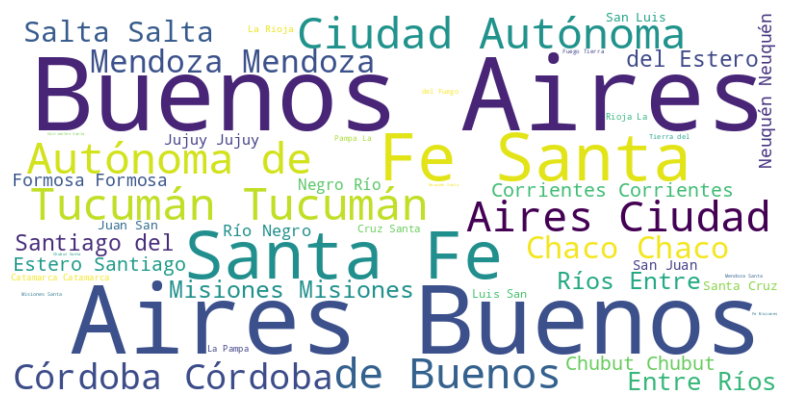

In [20]:
# Importar la librería wordcloud
from wordcloud import WordCloud

# Combinar los valores de una columna de texto en una sola cadena
text = ' '.join(df['provincia_nombre'].astype(str).tolist()) # Elegir la columna de texto deseada

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#Siendo Buenos Aires la provincia que más homicidios ha tenido en los años 2017-2023,
#pasaremos a focalizarnos en las características del delito de Homicidio Doloso en dicha jurisdiccion
#primero creare un nuevo df donde unicamente aquellos registros en los que 'provincia_nombre' == Buenos Aires y 'tipo-_persona' == 'Víctima'. y se llame df_BA

df_BA = df_2[(df_2['provincia_nombre'] == 'Buenos Aires') & (df_2['tipo_persona'] == 'Víctima')]
df_BA

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inculpados,cant_victimas,federal,provincia_id,provincia_nombre,departamento_id,...,victima_sexo,victima_identidad_genero,victima_identidad_genero_otro,victima_tramo_edad,victima_18_años_o_mas,victima_clase,victima_clase_otro,victima_situacion_ocupacional,victi_situacion_ocupacional_otro,victima_relacion_inculpado
3462,14097,HD Varón,Víctima idRegistro 14852,Víctima,1,1,No,6,Buenos Aires,6410,...,Masculino,Varón,NaN,35-39,Sí,Civil,NaN,Sin Determinar,NaN,Sin relación
3465,14098,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 14853,Víctima,1,2,No,6,Buenos Aires,6427,...,Masculino,Varón,NaN,20-24,Sí,Sin determinación,NaN,Sin Determinar,NaN,Sin determinación
3466,14098,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 14854,Víctima,1,2,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,25-29,Sí,Sin determinación,NaN,Sin Determinar,NaN,Sin determinación
3468,14099,HD Varón,Víctima idRegistro 14855,Víctima,1,1,No,6,Buenos Aires,6441,...,Masculino,Varón,NaN,30-34,Sí,Civil,NaN,Sin Determinar,NaN,Sin relación
3469,14100,HD Varón,Víctima idRegistro 14856,Víctima,1,1,No,6,Buenos Aires,6875,...,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,Sin Determinar,NaN,Hermano/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34018,33769,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 35944,Víctima,3,3,No,6,Buenos Aires,6882,...,Femenino,Mujer,NaN,10-14,No,Civil,NaN,No corresponde - Menor,NaN,Otros vínculos familiares
34019,33820,HD Varón,Víctima idRegistro 35994,Víctima,1,1,No,6,Buenos Aires,6490,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34022,33821,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 35995,Víctima,1,1,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,55-59,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34023,33822,HD Varón,Víctima idRegistro 35996,Víctima,1,1,No,6,Buenos Aires,6623,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Changarín,NaN,Hermano/a


In [22]:
df_BA.shape

(6223, 39)

Vemos que el data set ha quedado nuevamente reducido:

*menos registros:*

de 15.522 homicidios en el país, solo pasaré a analizar los 6.223 ocurridos en Buenos Aires. mismos atributos para el análisis.

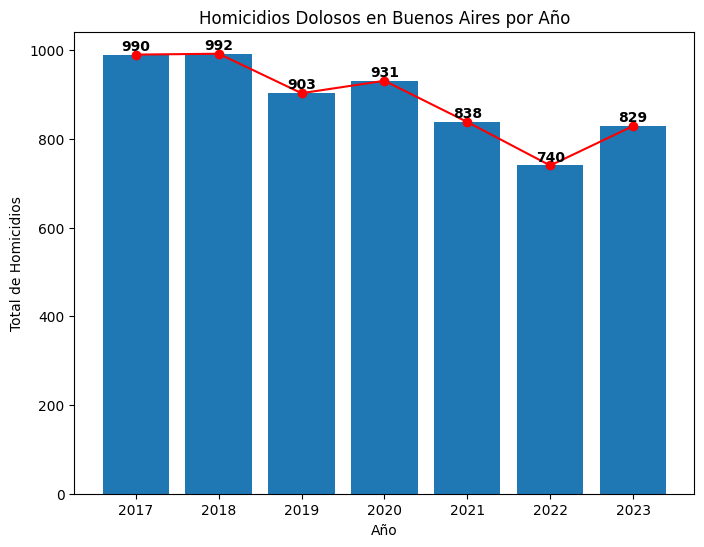

In [23]:
# agrupar los homicidios de Buenos Aires por año (recordemos que el período es 2017 a 2023)
homicides_by_year = df_BA.groupby('anio')['id_hecho'].count().reset_index()

# creacion gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(homicides_by_year['anio'], homicides_by_year['id_hecho'])
plt.xlabel('Año')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por Año')
plt.xticks(homicides_by_year['anio'])  # Set x-axis ticks to show all years

# agregar valores en cada columna
for i, v in enumerate(homicides_by_year['id_hecho']):
    plt.text(homicides_by_year['anio'][i], v + 10, str(v),
             ha='center', fontweight='bold')  # Adjust v + 10 for vertical position

# linea roja punteada año a año
plt.plot(homicides_by_year['anio'], homicides_by_year['id_hecho'],
         color='red', marker='o', linestyle='-')
plt.show()

Este gráfico es útil para comunicar de manera clara y concisa la disminución interanual de los Homicidios Dolosos por año en la Provincia de Buenos Aires (excepto en 2020 y 2023).
Veamos ahora en qué Municipios de la Provincia de Buenos Aires ocurrieron los homicidios del año 2023.



In [24]:
# Agrupar los homicidios por año y por departamento (en la Pcia. de Buenos Aires se llaman Municipios), y luego hacer un distinct count
department_counts_by_year = df_BA.groupby(['anio', 'departamento_nombre'])['id_hecho'].count().reset_index()

# Pivoter la tabla para tener los años como columna y los municipios como filas
table = department_counts_by_year.pivot(index='departamento_nombre', columns='anio', values='id_hecho')

# convertir los valores NaN con 0 y convertirlos al tipo enteros
table = table.fillna(0).astype(int)  # Convert to integers here

# calcular el total por departamento
table['Total'] = table.sum(axis=1)  # Sum across columns (years)

# Ordenar de mayor a menos de acuerdo al valor de la columna 'Total'
table = table.sort_values(by='Total', ascending=False)

# Mostrar la tabla con los resultados
print(table)

anio                 2017  2018  2019  2020  2021  2022  2023  Total
departamento_nombre                                                 
La Matanza            155   148   143   154   127   126   143    996
Moreno                 52    67    66    50    48    34    50    367
Lomas de Zamora        65    50    51    42    33    35    41    317
Quilmes                50    59    45    42    38    31    40    305
General Pueyrredón     36    48    46    33    39    32    43    277
...                   ...   ...   ...   ...   ...   ...   ...    ...
Lezama                  0     0     0     0     1     0     0      1
Saavedra                0     0     0     0     0     0     1      1
Salliqueló              0     0     0     0     1     0     0      1
Rivadavia               0     0     0     1     0     0     0      1
Tornquist               0     0     0     0     0     1     0      1

[125 rows x 8 columns]


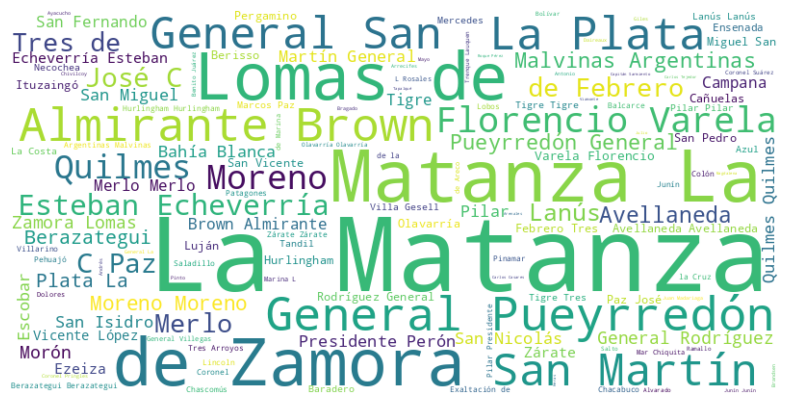

In [25]:
# Importar la librería wordcloud
from wordcloud import WordCloud

# Filter the DataFrame for 'Buenos Aires' and 'Víctima'
df_BA = df_2[(df_2['provincia_nombre'] == 'Buenos Aires') & (df_2['tipo_persona'] == 'Víctima')]

# Combinar los valores de una columna de texto en una sola cadena
text = ' '.join(df_BA['departamento_nombre'].astype(str).tolist()) # Elegir la columna de texto deseada

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

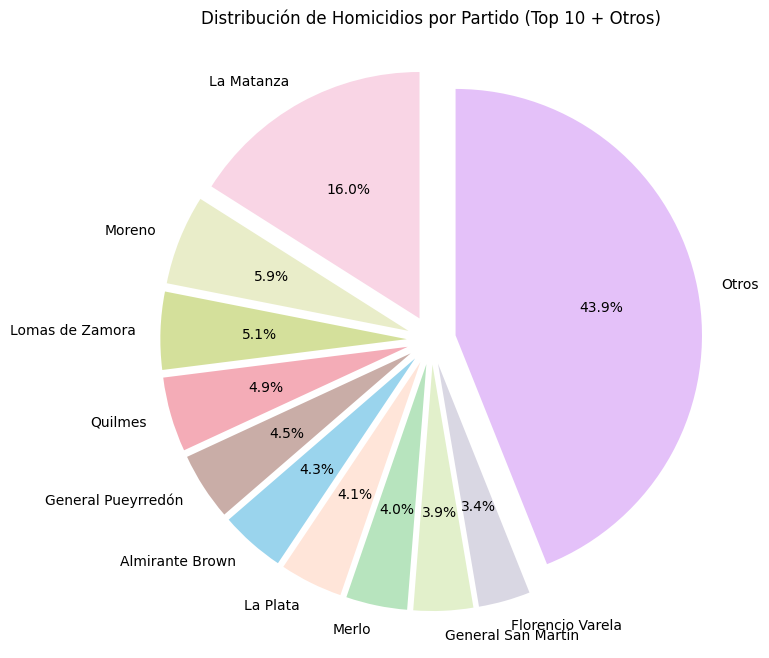

In [26]:
#considerando los primeros 10 partidos con más Homicidios dolosos de la Provincia,
#veamos como es la proporcion de los mismos, en el total del territorio bonaerense:

import matplotlib.pyplot as plt

# Obtener el top 10 de los municipios con sus totales
top_10_departments = table.head(10)

# Calcular la suma de totales de los restantes municipios
other_departments_count = table.iloc[10:, :].sum().sum()  # conteo desde la fila numero 11 en adelante

# Crear etiquetas (labels) para el grafico de torta
labels = top_10_departments.index.tolist() + ['Otros']  # Department names + 'Otros'

# Crear la data (labels) para el grafico de torta
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Definir color de la paleta con 11  colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear el grafico de torta con los colores
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Reutilizar la tupla explode
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode) #Fixed indentation
plt.title('Distribución de Homicidios por Partido (Top 10 + Otros)')
plt.show()

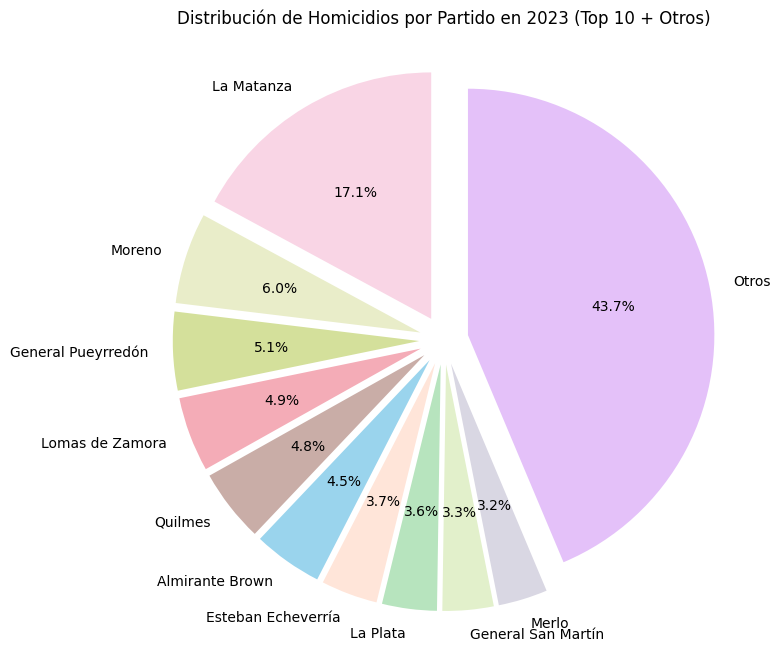

In [27]:
#veamos únicamente el año 2023 para ver si hay algun cambio sustancial en la proporcion de los Homicidios segun Partido:

import matplotlib.pyplot as plt

# filtar la tabla al año 2023
table_2023 = table[[2023]]  # Select only the column for 2023

# obtener top 10 de municipos y sus totales para 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# calcular la suma de los totales para los otrs municipios en 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# Crear etiquetas para grafico de torta
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# Crear data para el grafico de torta
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# Definir colores de la paleta con 11 colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear grafico de torta con los colores de la paleta
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Reutilizar la tupla explode
plt.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode) #Fixed indentation
plt.title('Distribución de Homicidios por Partido en 2023 (Top 10 + Otros)')
plt.show()

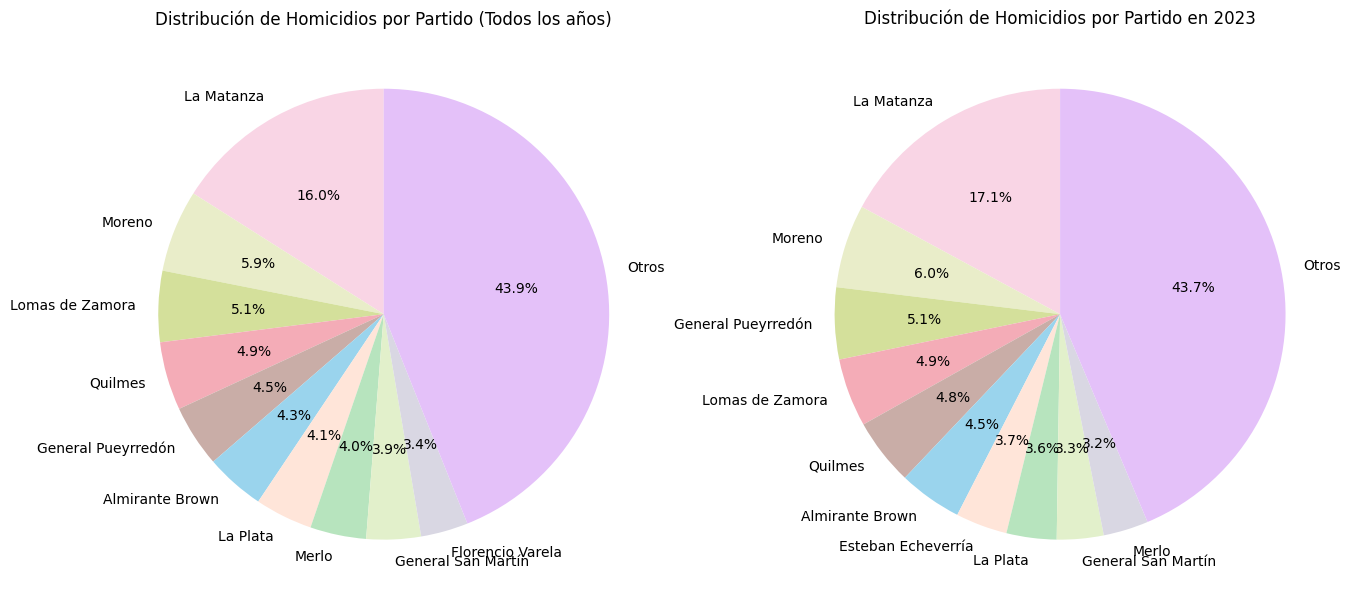

In [28]:
#veamolos uno al lado del otro para tener una mejor visualización:

import matplotlib.pyplot as plt

# pie total de los años 2017-2023

# obttener top 10 y totales
top_10_departments = table.head(10)  # seleccionar las primeras 10 filas

# Calcular la suma de los demás departamentos
other_departments_count = table.iloc[10:, :].sum().sum()  # Sum cuenta desde la fila 11 en adelante

# Crear etiquetas para el grafico
labels = top_10_departments.index.tolist() + ['Otros']  # nombre de departamentos + 'Otros'

# crear data para el grafico de torta
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Definir colores de la paleta con 11 colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']  # Add more colors if needed

#pie del año 2023
# filtrar la tabla para el año 2023
table_2023 = table[[2023]]  # seleccionar unicamente el año 2023

# obtener top 10 y contarlos para 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# calcular la suma de los conteos para los otros departamentos en 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# crear etiquetas
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# crear datapara el grafico
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# definir paleta de colores con  11 colors distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear subplots para los 2 graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Pie chart for all years
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribución de Homicidios por Partido (Todos los años)')

# Pie chart for 2023
ax2.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución de Homicidios por Partido en 2023')

plt.show()

# Femicidios

In [29]:
#pasemos a analizar el data set de acuerdo al Género de la Víctima, continuando el analisis dentro de la Provincia de Buenos Aires.
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# renombrar las columnas para mejor comprensión
homicides_by_year_sex = homicides_by_year_sex.rename(columns={'id_hecho': 'total_homicidios'})

# Print resultados
print(homicides_by_year_sex)

    anio victima_sexo  total_homicidios
0   2017     Femenino               148
1   2017    Masculino               842
2   2018     Femenino               145
3   2018    Masculino               847
4   2019     Femenino               147
5   2019    Masculino               756
6   2020     Femenino               139
7   2020    Masculino               792
8   2021     Femenino               104
9   2021    Masculino               734
10  2022     Femenino               121
11  2022    Masculino               619
12  2023     Femenino               129
13  2023    Masculino               700


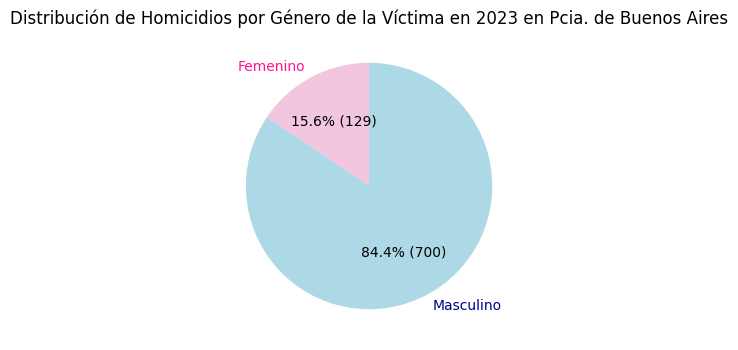

In [30]:
# filtar data para el año 2023
data_2023 = homicides_by_year_sex[homicides_by_year_sex['anio'] == 2023]

# obtener etiquetas y valores
labels = data_2023['victima_sexo']
values = data_2023['total_homicidios']

import matplotlib.pyplot as plt

#crear grafico
plt.figure(figsize=(4, 4))

# definir colores para slices y etiquetas
colors = ['#f2c6de', '#add8e6']  # Pink pastel para femenina, y Light blue pastel para masculinos

# definir colores para etiquetas
label_colors = ['#FF1493', '#00008B']  # usando hex codes para rosa y azul

# crear grafico con los colores y etiquetas elegidas
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*sum(values))})',
    startangle=90,
)

# Set label colors  usando colores indicados
for text, label_color in zip(texts, label_colors):
    text.set_color(label_color)

plt.title('Distribución de Homicidios por Género de la Víctima en 2023 en Pcia. de Buenos Aires')
plt.show()

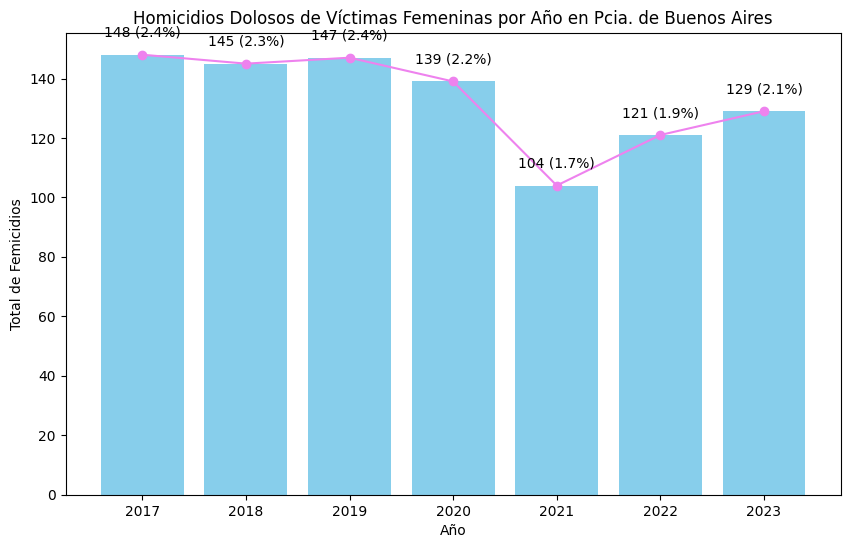

In [31]:
#analizaremos ahora la evolución de los Femicidios en la provincia de Buenos Aires

# filtar data para 'victima_sexo' == "Femenino"
female_homicides = homicides_by_year_sex[homicides_by_year_sex['victima_sexo'] == "Femenino"]

# obtener total homicidios por año
total_homicides_all_years = homicides_by_year_sex['total_homicidios'].sum()

# crear grafico torta
plt.figure(figsize=(10, 6))
bars = plt.bar(female_homicides['anio'], female_homicides['total_homicidios'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Total de Femicidios')
plt.title('Homicidios Dolosos de Víctimas Femeninas por Año en Pcia. de Buenos Aires')
plt.xticks(female_homicides['anio'])

# agregar porcentaje en cima de cada colmna
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_homicides_all_years) * 100  # Calculate percentage
    label_text = f'{int(height)} ({percentage:.1f}%)'  # Format label
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, label_text,
             ha='center', va='bottom')

#conectar las columnas con linea
plt.plot(female_homicides['anio'], female_homicides['total_homicidios'],
         color='violet', marker='o', linestyle='-')

plt.show()

In [32]:
#Analicemos los femicidios por Partido en la Provincia de Buenos Aires
# filtrar data para victimas femeninas
female_homicides_all_years = df_BA[df_BA['victima_sexo'] == "Femenino"]

# agrupar por departamento y contar homicidios
department_counts_female = female_homicides_all_years.groupby('departamento_nombre')['id_hecho'].count().reset_index()

# renombrar la columna del conteo
department_counts_female = department_counts_female.rename(columns={'id_hecho': 'Total'})

# ordenar de acuerdo al Total y en orden  descendente
department_counts_female = department_counts_female.sort_values(by='Total', ascending=False)

# mostrar tabla
print(department_counts_female)

   departamento_nombre  Total
50          La Matanza     85
51            La Plata     54
57     Lomas de Zamora     50
40  General Pueyrredón     46
63              Moreno     43
..                 ...    ...
77            Saavedra      1
74           Rivadavia      1
89            Tapalqué      1
93         Tres Lomas       1
97           Villarino      1

[99 rows x 2 columns]


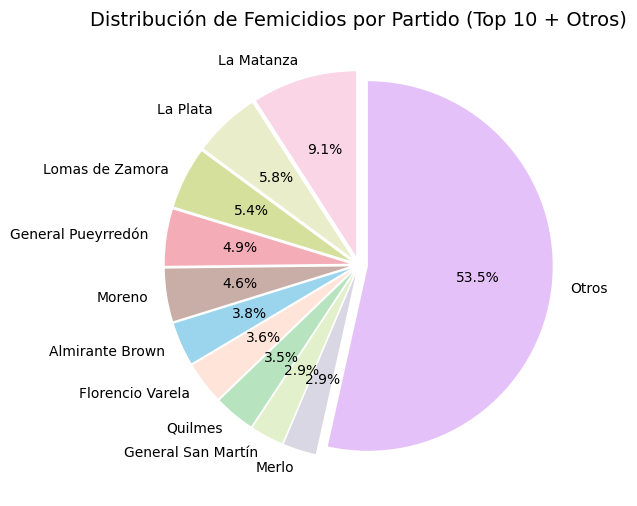

In [33]:
#top 10 de femicidios por partido

# obtener top 10 por departamento y contarlos
top_10_departments = department_counts_female.head(10)

# calcular la suma de los conteos para los otros departamentos
other_departments_count = department_counts_female.iloc[10:]['Total'].sum()

# crear etiquetas
labels = top_10_departments['departamento_nombre'].tolist() + ['Otros']

# Crear data
sizes = top_10_departments['Total'].tolist() + [other_departments_count]

# Definir 11 colores distitnos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']
# crear el grafico
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0.05] * len(sizes), startangle=90)
plt.title('Distribución de Femicidios por Partido (Top 10 + Otros)', fontsize=14)
plt.show()

Vemos que el lugar donde más femicidios hay en la Provincia de Buenos Aires, coincide con el Municipio donde más homicidios se cometen.

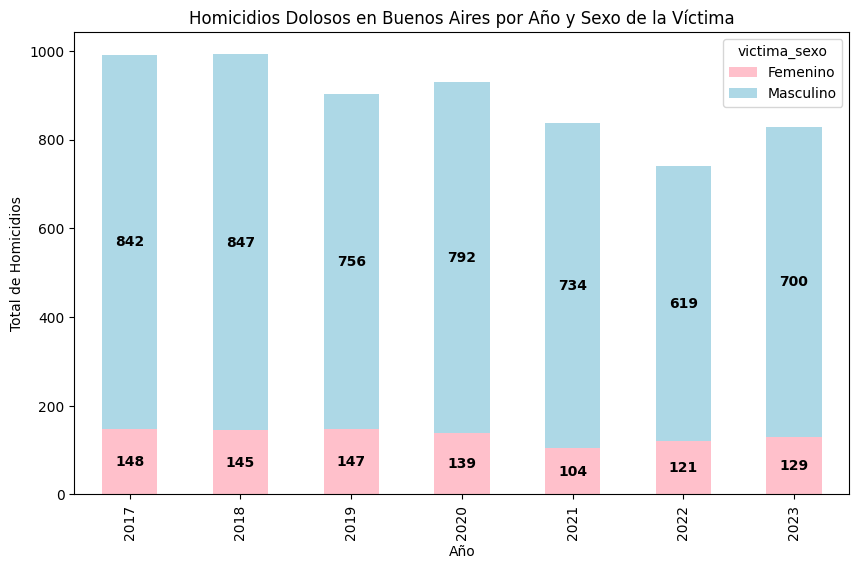

In [34]:
# Analisis de Homicidios Dolosos en Buenos Aires por Año y Sexo de la Víctima
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# Pivotear la tabla para tener los años como columna y sexo de las victimas como filas
table_stacked = homicides_by_year_sex.pivot(index='anio', columns='victima_sexo', values='id_hecho')

# crear grafico de columnas apiladas
ax = table_stacked.plot(kind='bar', stacked=True, figsize=(10, 6), color={'Femenino': 'pink', 'Masculino': 'lightblue'})
plt.xlabel('Año')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por Año y Sexo de la Víctima')

# conectar el total de homicidios con una linea roja y puntos rojos
total_homicides_by_year = table_stacked.sum(axis=1)  # Calculate total por año
plt.plot(total_homicides_by_year.index, total_homicides_by_year.values,
         color='red', marker='o', linestyle='-')

# agregar conteo de etiquetas Add count labels to each segment
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x() + width / 2
    y = bar.get_y() + height / 2
    label_text = f'{int(height)}'  # Format label text
    ax.text(x, y, label_text, ha='center', va='center', fontweight='bold')  # Add label

plt.show()

**Histogramas**

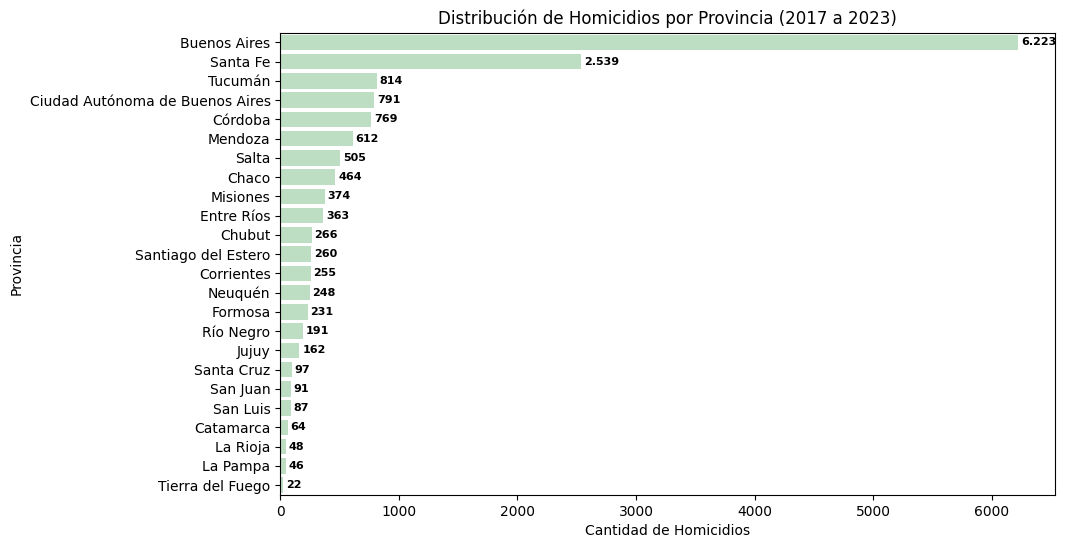

In [35]:
#volvamos al data set original (df) para analizar dónde se concentran los datos de acuerdo a la Provincia:

# 'df' es el data set de todas las provincias
# fitrar el  DataFrame  para mostrar unicamente victimas
victims_df = df[df['tipo_persona'] == 'Víctima']

# calcular conteo de provincias basado en el dataframe filtrado
province_counts = victims_df['provincia_nombre'].value_counts()

# funcion para dar formato de contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # reemplaza coma a formato contabilidad

# crear barras horizontales con los colores elegidos
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=province_counts.index, x=province_counts.values, color='#b7e4be', orient='h')  # Set bar color and orientation
plt.title('Distribución de Homicidios por Provincia (2017 a 2023)')
plt.ylabel('Provincia')
plt.xlabel('Cantidad de Homicidios')

# agregar etiqueta con valores a cada barra en el formato de contabilidad
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

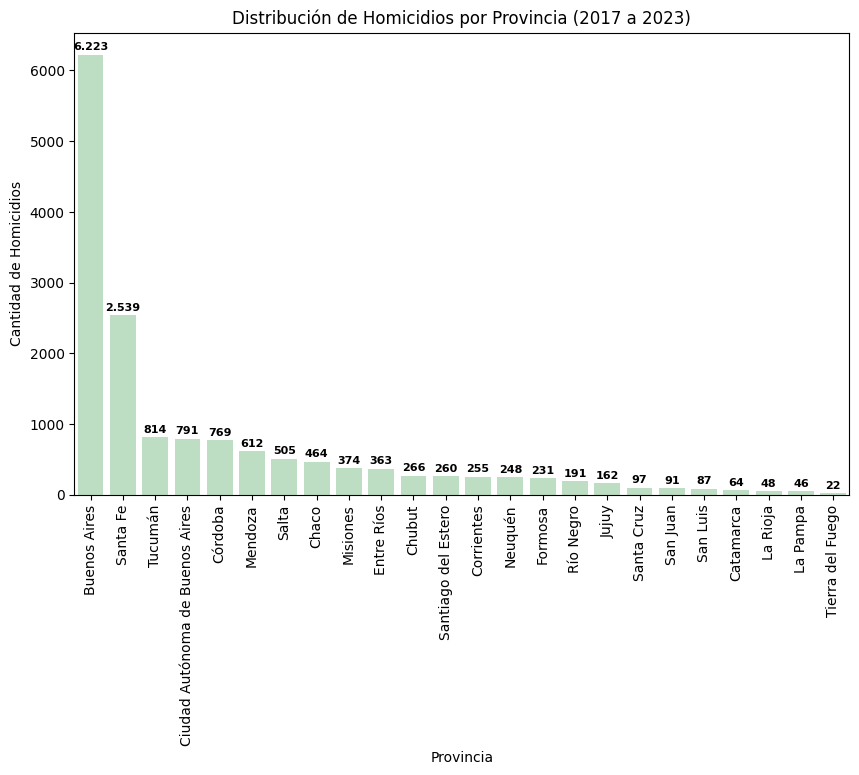

In [36]:
#volvamos al data set original (df) para analizar dónde se concentran los datos de acuerdo a la Provincia:

# 'df' es el data set de todas las provincias
# Fitrar solo victimas
victims_df = df[df['tipo_persona'] == 'Víctima']

# calcular provincias y contarlas
province_counts = victims_df['provincia_nombre'].value_counts()

# agregar etiquetas a cada columna
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, color='black')

# formato contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # Rreemplaza coma por punto

# crea grafico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=province_counts.index, y=province_counts.values, color='#b7e4be')  # Set bar color
plt.xticks(rotation=90, ha='center')  # Rotate and center x-axis labels
plt.title('Distribución de Homicidios por Provincia (2017 a 2023)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Homicidios')

# agregar etiqueta  a cada barra
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

Porcentaje de Homicidios por Provincia (Solo Víctimas):
 provincia_nombre
Buenos Aires                       40.09
Santa Fe                           16.36
Tucumán                             5.24
Ciudad Autónoma de Buenos Aires     5.10
Córdoba                             4.95
Mendoza                             3.94
Salta                               3.25
Chaco                               2.99
Misiones                            2.41
Entre Ríos                          2.34
Chubut                              1.71
Santiago del Estero                 1.68
Corrientes                          1.64
Neuquén                             1.60
Formosa                             1.49
Río Negro                           1.23
Jujuy                               1.04
Santa Cruz                          0.62
San Juan                            0.59
San Luis                            0.56
Catamarca                           0.41
La Rioja                            0.31
La Pampa                

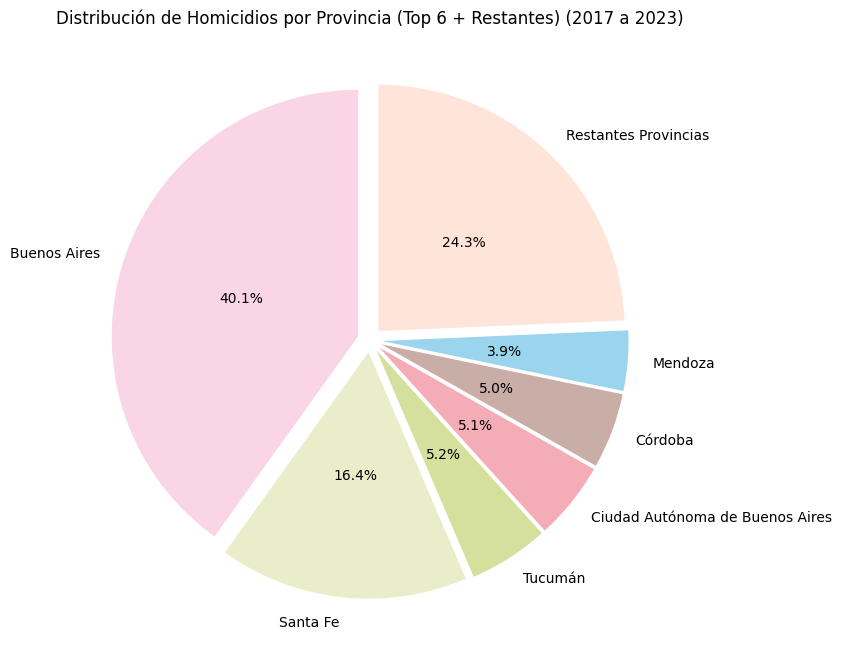

In [37]:
#Analisis porcentual por provincias
# calcular conteo de provincias basado en el data set de victimas
province_counts = victims_df['provincia_nombre'].value_counts()

# calculo porcettajes por provicna
province_percentages = (province_counts / province_counts.sum() * 100).round(2)

# Print % por province
print("Porcentaje de Homicidios por Provincia (Solo Víctimas):\n", province_percentages)

# Crear grafico para top 6  + 'Restantes Provincias'
top_6_provinces = province_percentages.head(6)
other_provinces_percentage = province_percentages.iloc[6:].sum()

pie_chart_data = pd.concat([top_6_provinces, pd.Series([other_provinces_percentage], index=['Restantes Provincias'])])

# definir colores
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
          '#9ad4ed', '#ffe5d9']  # Use only 7 colors for 7 slices

plt.figure(figsize=(8, 8))
# aplicar colores y formato indicados
plt.pie(x=pie_chart_data, autopct="%.1f%%", labels=pie_chart_data.index,
        explode=[0.05] * len(pie_chart_data), pctdistance=0.5, startangle=90,
        colors=colors)  # Add colors parameter
plt.title('Distribución de Homicidios por Provincia (Top 6 + Restantes) (2017 a 2023)')
plt.show()

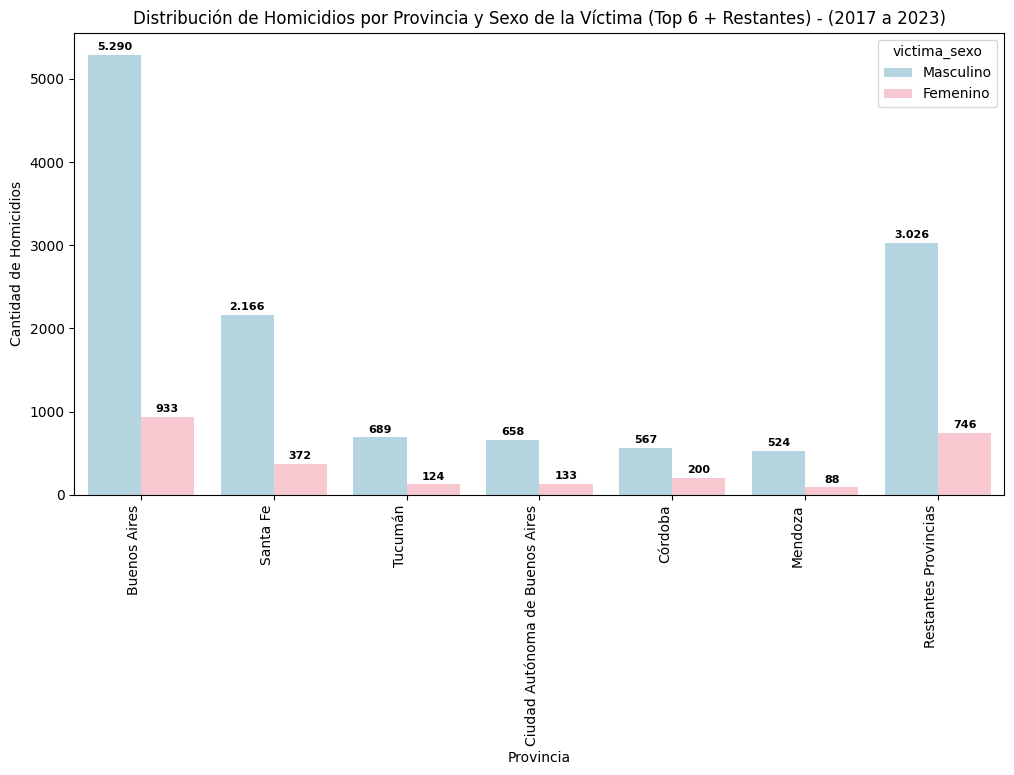

In [38]:
# continuando con el data set basado en vicitmas unicamente

# calcular provincias
province_counts = victims_df['provincia_nombre'].value_counts()

#  agrupar provincias y sexo de victima y contar los homicidios
province_sex_counts = victims_df.groupby(['provincia_nombre', 'victima_sexo'])['id_hecho'].count().reset_index()

# renombrar la colummna
province_sex_counts = province_sex_counts.rename(columns={'id_hecho': 'total_homicidios'})

# Calcular total homicidios por pcia
total_homicides_by_province = province_sex_counts.groupby('provincia_nombre')['total_homicidios'].sum().sort_values(ascending=False)

#  top 6 pcias
top_6_provinces = total_homicides_by_province.head(6).index.tolist()

# reemplazar con el valor "Restantes Provincias"
province_sex_counts['provincia_nombre'] = province_sex_counts['provincia_nombre'].apply(lambda x: x if x in top_6_provinces else 'Restantes Provincias')

# agrupar luego de renombrar las pcias
province_sex_counts = province_sex_counts.groupby(['provincia_nombre', 'victima_sexo'])['total_homicidios'].sum().reset_index()

# Filter out "Sin determinar" from province_sex_counts
province_sex_counts = province_sex_counts[province_sex_counts['victima_sexo'] != 'Sin determinar']

# separador de contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # Replace commas with periods for accounting format

# ordenar por province_sex_counts por total_homicidios  en orden descendente
province_sex_counts = province_sex_counts.sort_values(by=['total_homicidios'], ascending=False)

# Create a custom order for the x-axis categories
categories_order = province_sex_counts['provincia_nombre'].unique().tolist()
categories_order.remove('Restantes Provincias')  # Remove and append to the end
categories_order.append('Restantes Provincias')

# Create the bar plot with custom colors, hue, and order
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(
    x='provincia_nombre',
    y='total_homicidios',
    hue='victima_sexo',
    data=province_sex_counts,
    palette={'Femenino': 'pink', 'Masculino': 'lightblue'},  # Custom color palette
    order=categories_order  # Set the order of x-axis categories
)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.title('Distribución de Homicidios por Provincia y Sexo de la Víctima (Top 6 + Restantes) - (2017 a 2023)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Homicidios')

# Add value labels to each bar with custom formatting
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

**Series de Tiempo**

<ipython-input-40-e0725085d622>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


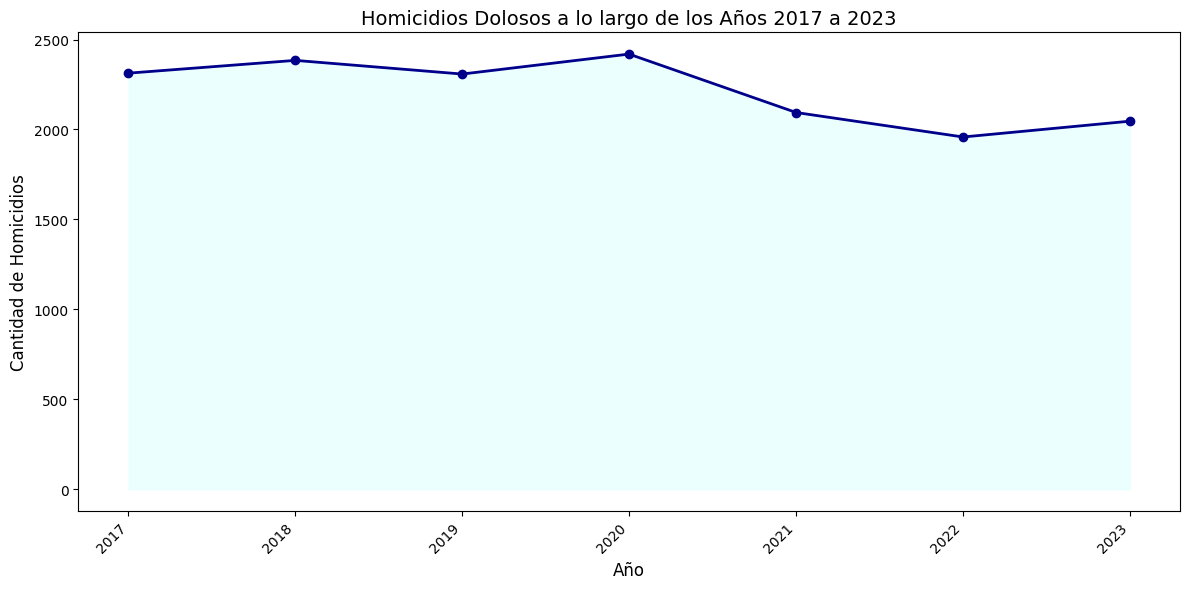

In [40]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker # This import was missing and is needed for mdates

# Convertir  'fecha_hecho' a formato datetime
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# agrupar data por mes y contar homidicios segun vitimas
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('Y')).size()

# generar grafico de lineas
fig, ax = plt.subplots(figsize=(12, 6))

# Convert the index to datetime for plotting
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # Dark blue line, thicker, with markers
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Light cyan fill, semi-transparent

plt.title('Homicidios Dolosos a lo largo de los Años 2017 a 2023', fontsize=14)  # Larger title
plt.xlabel('Año', fontsize=12)  # Larger x-axis label
plt.ylabel('Cantidad de Homicidios', fontsize=12)  # Larger y-axis label

# Format x-axis ticks for better readability (show every year)
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust spacing
plt.show()

<ipython-input-39-78585eb4339e>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])
<ipython-input-39-78585eb4339e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


NameError: name 'mdates' is not defined

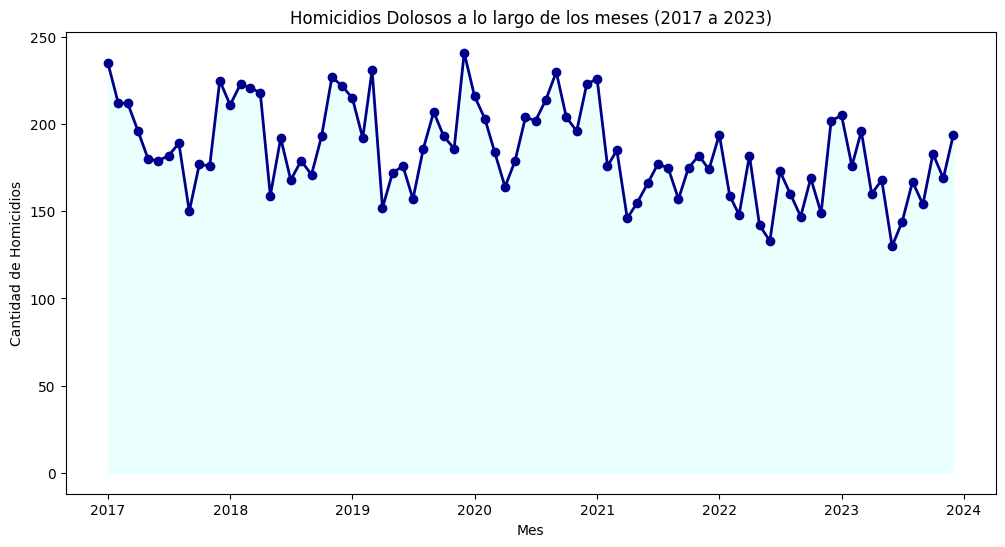

In [39]:
import matplotlib.dates as mpl_dates
# Convertir 'fecha_hecho' al formato datetime en el df_victims
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# Agrupar mensualmente contando unicamente víctimas.
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('M')).size()

# Generar gráfico de líneas con sombreado y línea personalizada
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar tamaño de la figura si es necesario

# Convertir el índice a datetime antes de graficar
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # Línea azul oscuro, más gruesa y con puntos
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Sombreado celeste pastel
plt.title('Homicidios Dolosos a lo largo de los meses (2017 a 2023)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Homicidios')


# Using MonthLocator and DateFormatter to control labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Etiqueta cada 6 meses
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Línea cada mes # Optional for gridlines
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de etiqueta


plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()  # Ajustar espaciado
plt.show()

<ipython-input-41-13668e5fac9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


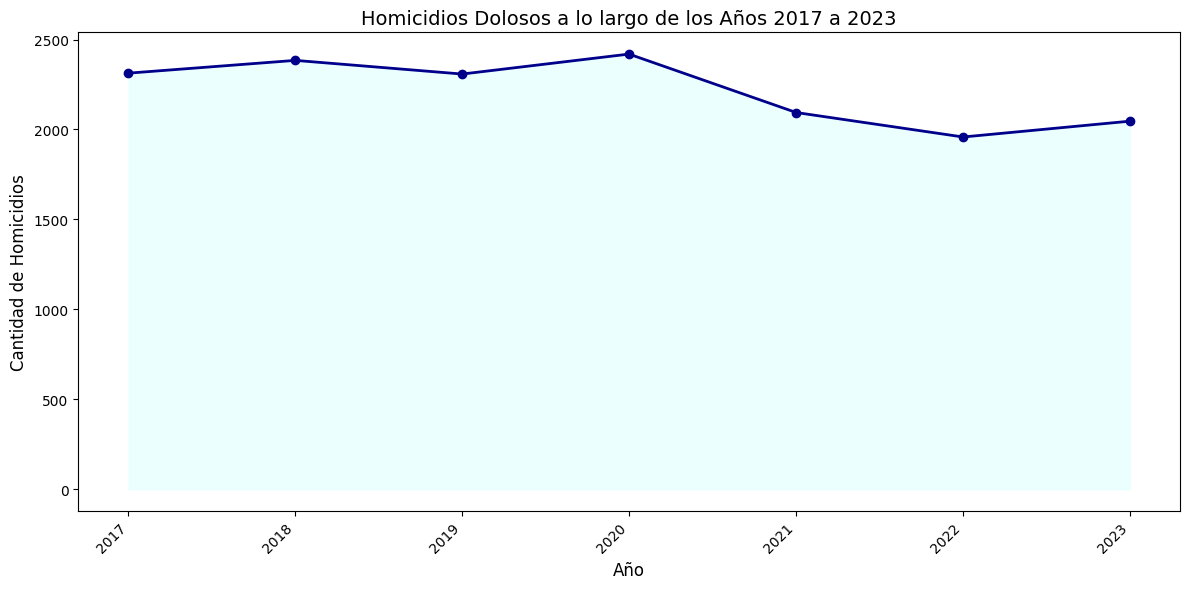

In [41]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# convertir  'fecha_hecho' a formato datetime
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# agrupar data por mes y contar homidicios segun vitimas
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('Y')).size()

# generar grafico de lineas
fig, ax = plt.subplots(figsize=(12, 6))

# Convert the index to datetime for plotting
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # Dark blue line, thicker, with markers
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Light cyan fill, semi-transparent

plt.title('Homicidios Dolosos a lo largo de los Años 2017 a 2023', fontsize=14)  # Larger title
plt.xlabel('Año', fontsize=12)  # Larger x-axis label
plt.ylabel('Cantidad de Homicidios', fontsize=12)  # Larger y-axis label

# Format x-axis ticks for better readability (show every year)
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust spacing
plt.show()

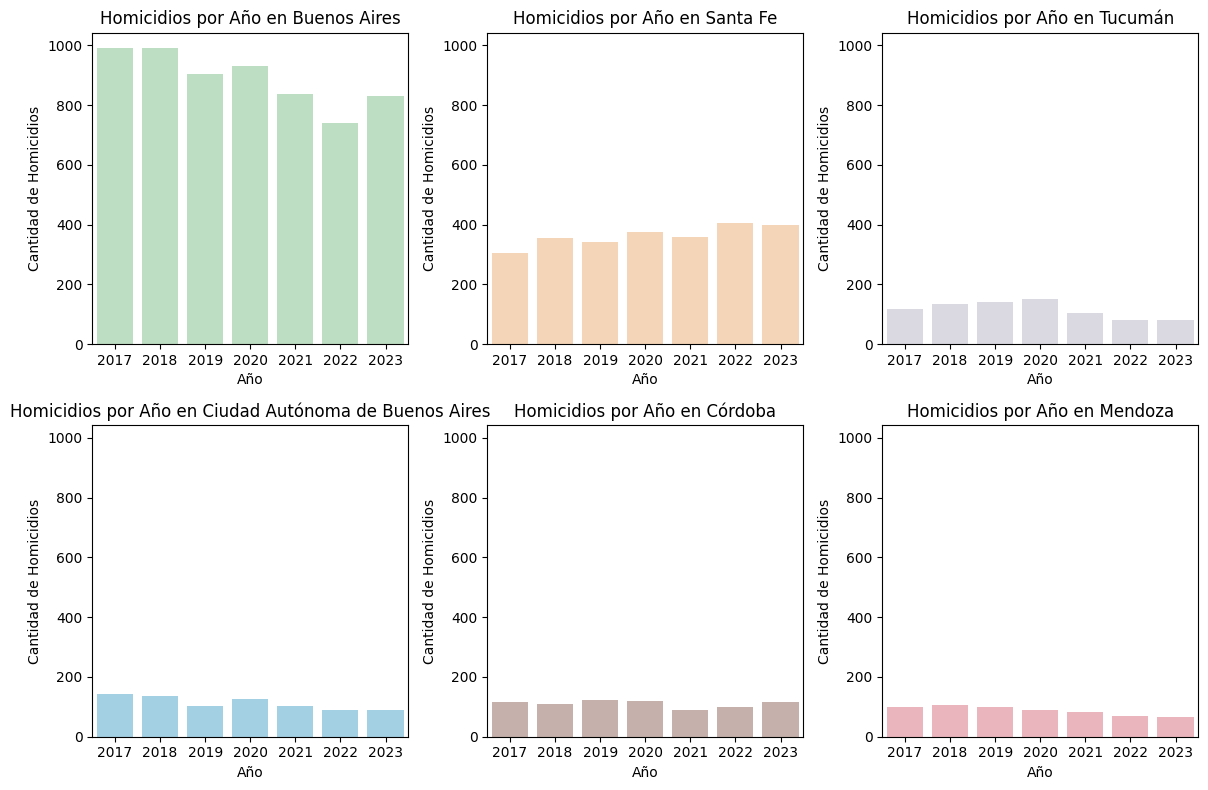

In [43]:
# agropar por provnicia y por año y contar los homicidios (usando victims_df)
provincia_year_counts = victims_df.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()
provincia_year_counts = provincia_year_counts.rename(columns={'id_hecho': 'homicidios'})

# obtener top 6 de provincias con los valores maximos
top_6_provinces = provincia_year_counts.groupby('provincia_nombre')['homicidios'].sum().nlargest(6).index

# definir paleta
colors = {
    'Buenos Aires': '#b7e4be', #verde
    'Mendoza': '#f4acb7',  #naranja
    'Santa Fe': '#ffd5ae', #violeta
    'Córdoba': '#c9ada7', #celeste
    'Tucumán': '#d9d7e3', #marrón
    'Salta': '#ffe5d9', #coral
    'Ciudad Autónoma de Buenos Aires': '#9ad4ed'
}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize as needed

# Get the maximum y-value across all provinces
max_homicidios = provincia_year_counts['homicidios'].max()

# Iterate through the top 6 provinces and create bar charts
for i, provincia in enumerate(top_6_provinces):
    provincia_data = provincia_year_counts[provincia_year_counts['provincia_nombre'] == provincia]
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Use the color from the palette for this province,
    # If the province is not in the colors dictionary, use a default color
    color = colors.get(provincia, 'grey') # Use 'grey' as default if the province is not found
    sns.barplot(x='anio', y='homicidios', data=provincia_data, ax=ax, color=color)

    ax.set_title(f'Homicidios por Año en {provincia}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Cantidad de Homicidios')

    # Set the y-axis limits to be the same for all subplots
    ax.set_ylim(0, max_homicidios + 50)  # Add a small buffer for better visualization

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

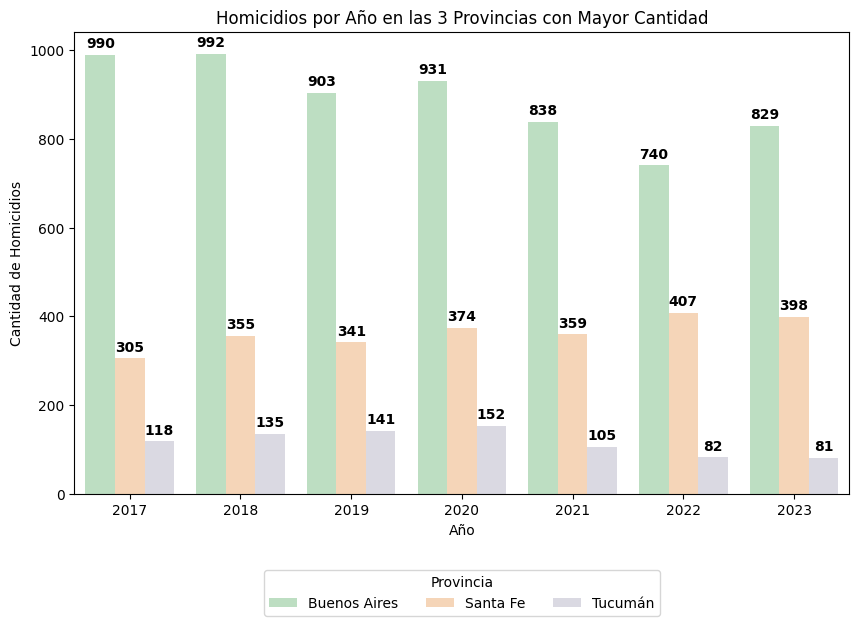

In [44]:
# Group data by provincia_nombre and year, then count homicides (using victims_df)
provincia_year_counts = victims_df.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()
provincia_year_counts = provincia_year_counts.rename(columns={'id_hecho': 'homicidios'})

# Get the top 3 provinces with the highest total homicides (using victims_df)
top_3_provinces = provincia_year_counts.groupby('provincia_nombre')['homicidios'].sum().nlargest(3).index

# Filter data for the top 3 provinces
top_3_data = provincia_year_counts[provincia_year_counts['provincia_nombre'].isin(top_3_provinces)]

colors = {
    'Buenos Aires': '#b7e4be',
    'Mendoza': '#f4acb7',
    'Santa Fe': '#ffd5ae',
    'Córdoba': '#c9ada7',
    'Tucumán': '#d9d7e3',
    'Salta': '#ffe5d9',
    'Ciudad Autónoma de Buenos Aires': '#9ad4ed'
}

# Get the colors for the top 3 provinces
top_3_colors = [colors[province] for province in top_3_provinces]


# Create the grouped bar chart using seaborn with custom colors
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='anio', y='homicidios', hue='provincia_nombre', data=top_3_data, palette=top_3_colors)  # Use palette argument

plt.title('Homicidios por Año en las 3 Provincias con Mayor Cantidad')
plt.xlabel('Año')
plt.ylabel('Cantidad de Homicidios')

# Move legend to horizontal position below the chart
plt.legend(title='Provincia', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Add total values above each column in bold
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 10,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.show()

### Transformaciones previas al análisis Bivariado Edad × Género  
*(Provincia de Buenos Aires)*

| Paso | Qué hice | Motivo |
|------|----------|--------|
| **1 – Auditoría de la variable** | Inspeccioné los valores únicos de `victima_tramo_edad` y hallé:<br>• Rangos válidos: `4 o menos`, `15‑19`, `20‑24`, …, `90 y más`.<br>• Valores erróneos: `41913`, `45905`.<br>• Etiquetas sin dato: `No corresponde`, `Sin determinar`. | Saber qué limpiar antes de cruzar con género. |
| **2 – Asignación de valores medios** | Definí `age_mapping` para mapear cada tramo a su edad promedio:<br>`'15‑19'→17`, `'20‑24'→22`, …, `'90 y más'→92`. | Convertir la edad de categórica a numérica continua. |
| **3 – Filtrado de casos válidos** | Generé `filtered_df` manteniendo solo las filas cuyo rango esté en `age_ranges`. | Excluir outliers y etiquetas sin dato que distorsionan el análisis. |
| **4 – Reemplazo de texto por número** | Apliqué `.map(age_mapping)` sobre `victima_tramo_edad`, sustituyendo el texto por la edad media asignada. | Obtener una columna **edad numérica** (`Int64`) lista para el cruce con `victima_genero`. |

> Tras estos pasos la edad queda expresada en valores enteros, sin inconsistencias, y lista para el análisis bivariado con el género de la víctima.


In [45]:
#2. Definir qué valor único corresponde asignar a cada una de los tramos de edad (rango etareo existente)
age_ranges = ['15-19', '20-24', '25-29', '30-34', '35-39', '4 o menos', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90 y más']
age_values = [17, 22, 27, 31, 37, 4, 42, 47, 52, 56, 62, 67, 72, 76, 82, 87, 92]

# Crear diccionario mapeando los rangos de edades y valores
age_mapping = dict(zip(age_ranges, age_values))

# Filtrar data frame para incluir  solo los rangos de valores de edad especificados
filtered_df = df_2[df_2['victima_tramo_edad'].isin(age_ranges)]

# reemplazar los tramos  de edad por los valores correspondientes
filtered_df['victima_tramo_edad'] = filtered_df['victima_tramo_edad'].map(age_mapping)

# ahora  filtered_df contiene la data transformada
print(filtered_df.head())


    id_hecho tipo_hecho_segun_victima           tipo_persona_id tipo_persona  \
0      11535                 HD Varón  Víctima idRegistro 12235      Víctima   
6      11536                 HD Varón  Víctima idRegistro 12236      Víctima   
7      11537                 HD Varón  Víctima idRegistro 12237      Víctima   
10     11538                 HD Varón  Víctima idRegistro 13009      Víctima   
12     11539                 HD Varón  Víctima idRegistro 12239      Víctima   

    cant_inculpados  cant_victimas federal  provincia_id provincia_nombre  \
0                 3              1      No            58          Neuquén   
6                 2              1      No            58          Neuquén   
7                 1              1      No            58          Neuquén   
10                1              1      No            58          Neuquén   
12                1              1      No            58          Neuquén   

    departamento_id  ... victima_sexo victima_identidad_

<ipython-input-45-36d09ef588a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['victima_tramo_edad'] = filtered_df['victima_tramo_edad'].map(age_mapping)


In [46]:
#Haré un box plot para comparar la edad de las víctimas de homicidio de acuerdo al género
!pip install plotly
import plotly.express as px # import the library providing the px object

# crear box plot con  plotly.express
fig = px.box(
    filtered_df,
    x='victima_sexo',
    y='victima_tramo_edad',
    color='victima_sexo', # Use 'color' to assign colors based on 'victima_sexo'
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"}, # Custom color mapping
    title='Distribución de la Edad de las Víctimas por Sexo en Todas las Provincias'
)

fig.update_layout(
    xaxis_title='Sexo de la Víctima',
    yaxis_title='Edad de la Víctima'
)

fig.show()

In [47]:
import plotly.express as px

# crear  violin plot con  plotly.express
fig = px.violin( # Changed to px.violin
    filtered_df,
    x='victima_sexo',
    y='victima_tramo_edad',
    color='victima_sexo',
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"},
    title='Distribución de la Edad de las Víctimas por Sexo en Todas las Provincias'
)

fig.update_layout(
    xaxis_title='Sexo de la Víctima',
    yaxis_title='Edad de la Víctima'
)

fig.show()

<ipython-input-48-64ec0df2c933>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




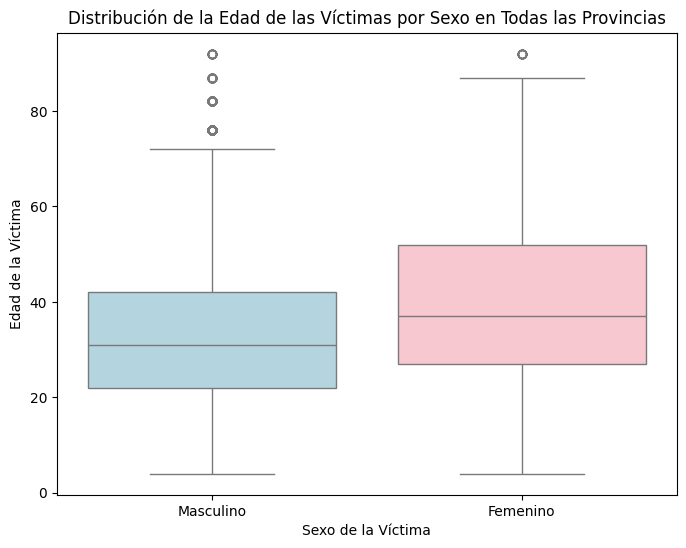

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot with seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(
    x='victima_sexo',
    y='victima_tramo_edad',
    data=filtered_df,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribución de la Edad de las Víctimas por Sexo en Todas las Provincias')
plt.xlabel('Sexo de la Víctima')
plt.ylabel('Edad de la Víctima')
plt.show()

<ipython-input-49-6f3f2e39e4fc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




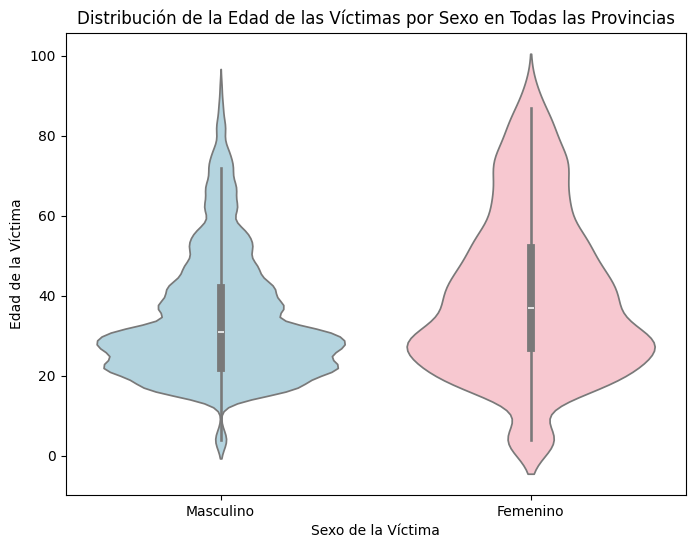

In [49]:
#hare el mismo grafico anterior pero formato violin para ver si es mas facil de epxlicar la data:
# crear violin plot with seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.violinplot(
    x='victima_sexo',
    y='victima_tramo_edad',
    data=filtered_df,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribución de la Edad de las Víctimas por Sexo en Todas las Provincias')
plt.xlabel('Sexo de la Víctima')
plt.ylabel('Edad de la Víctima')
plt.show()

para exponer la informacino que se quiere evidenciar en el reporte, es más grafico y entendible el de box plot respecto del de violin.

In [50]:
from IPython.display import display, Markdown  # Import necessary functions

# Group data by gender and calculate statistics
gender_age_stats = filtered_df.groupby('victima_sexo')['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])

# Rename columns for better understanding
gender_age_stats = gender_age_stats.rename(columns={
    'min': 'Edad Mínima',
    'max': 'Edad Máxima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' to one decimal place
gender_age_stats['Promedio'] = gender_age_stats['Promedio'].map('{:.1f}'.format)

# Display the table with a title
display(Markdown("## Tabla Todas las Provincias. Año 2017 a 2023."))  # Add title using Markdown
display(gender_age_stats)

## Tabla Todas las Provincias. Año 2017 a 2023.

,Edad Mínima,Edad Máxima,Promedio,Mediana,Moda
victima_sexo,,,,,
Femenino,4,92,40.0,37.0,27
Masculino,4,92,34.3,31.0,22


In [51]:
#vemos como conclusión que cuando se trata de un femicidio, la edad de la víctima es más elevada que la de los homicidios contra hombres.

**¿Sucede lo mismo en la Provincia de Buenos Aires?**

Analizaré las edades de los homicidios en los 5 municipios con mayor cantidad de Víctimas.

In [52]:
import plotly.express as px
from IPython.display import display # Assuming you already have this import

# Filtar data para Buenos Aires
buenos_aires_data = filtered_df[filtered_df['provincia_nombre'] == 'Buenos Aires']

# Get the top 5 departments by homicide count
top_5_departments = buenos_aires_data['departamento_nombre'].value_counts().head(5).index.tolist()

# Filter data for the top 5 departments
top_5_data = buenos_aires_data[buenos_aires_data['departamento_nombre'].isin(top_5_departments)]

# Create the box plot with plotly.express
fig = px.box(
    top_5_data,
    x='departamento_nombre',  # Changed to 'departamento_nombre'
    y='victima_tramo_edad',
    color='victima_sexo',
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"},
    title='Distribución de la Edad de las Víctimas por Sexo en los 5 Municipios con más Homicidios en Buenos Aires'
)

fig.update_layout(
    xaxis_title='Municipio',  # Changed x-axis title
    yaxis_title='Edad de la Víctima'
)

fig.show()

# Statistical analysis for each of the top 5 departments
top_5_municipality_stats = top_5_data.groupby(['departamento_nombre', 'victima_sexo'])['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
top_5_municipality_stats = top_5_municipality_stats.rename(columns={
    'min': 'Edad Mínima',
    'max': 'Edad Máxima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' column to one decimal place
top_5_municipality_stats['Promedio'] = top_5_municipality_stats['Promedio'].map('{:.1f}'.format)

# Display title for the municipality statistics section
display(Markdown("## Estadísticas por Municipios de Buenos Aires (Top 5)"))

# Display the table for each municipality
print("Estadísticas de edad por género en los 5 municipios con más Homicidios de Buenos Aires:")
for municipality in top_5_departments:
    print(f"\nMunicipio: {municipality}")
    print(top_5_municipality_stats.loc[municipality])

# Overall statistical analysis (from previous code)
gender_age_stats = filtered_df.groupby('victima_sexo')['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
gender_age_stats = gender_age_stats.rename(columns={
    'min': 'Edad Mínima',
    'max': 'Edad Máxima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' column to one decimal place for overall stats
gender_age_stats['Promedio'] = gender_age_stats['Promedio'].map('{:.1f}'.format)

# Display title for overall statistics
display(Markdown("## Estadísticas en Argentina de Edad por Género"))

# Display both tables
print("\nEstadísticas generales de edad por género:")
print(gender_age_stats)

# Combine tables for comparison
all_stats = pd.concat([top_5_municipality_stats, gender_age_stats], keys=['Top 5 Municipios', 'General'], names=['Grupo', 'victima_sexo'])

# Reset index
all_stats = all_stats.reset_index()

# Convert 'Promedio' to numeric before applying formatting
all_stats['Promedio'] = pd.to_numeric(all_stats['Promedio'], errors='coerce')  # Convert to numeric

# Apply formatting to the combined table
all_stats['Promedio'] = all_stats['Promedio'].map('{:.1f}'.format)


pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns

# Display title for comparison
display(Markdown("## Comparación de Estadísticas: Argentina vs. Top 5 de Buenos Aires"))

# Display the comparison table
print("\nComparación de estadísticas:")
print(all_stats)

## Estadísticas por Municipios de Buenos Aires (Top 5)

Estadísticas de edad por género en los 5 municipios con más Homicidios de Buenos Aires:

Municipio: La Matanza
              Edad Mínima  Edad Máxima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           87     40.7     37.0    27
Masculino               4           82     32.1     27.0    22

Municipio: Moreno
              Edad Mínima  Edad Máxima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           87     38.1     31.0    27
Masculino               4           92     34.4     31.0    22

Municipio: Lomas de Zamora
              Edad Mínima  Edad Máxima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           62     31.6     31.0    31
Masculino               4           82     31.1     27.0    22

Municipio: Quilmes
              Edad Mínima  Edad Máxima Promedio  Mediana  Moda
vic

## Estadísticas en Argentina de Edad por Género


Estadísticas generales de edad por género:
              Edad Mínima  Edad Máxima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           92     40.0     37.0    27
Masculino               4           92     34.3     31.0    22


## Comparación de Estadísticas: Argentina vs. Top 5 de Buenos Aires


Comparación de estadísticas:
               Grupo                     victima_sexo  Edad Mínima  \
0   Top 5 Municipios   (General Pueyrredón, Femenino)            4   
1   Top 5 Municipios  (General Pueyrredón, Masculino)            4   
2   Top 5 Municipios           (La Matanza, Femenino)            4   
3   Top 5 Municipios          (La Matanza, Masculino)            4   
4   Top 5 Municipios      (Lomas de Zamora, Femenino)            4   
5   Top 5 Municipios     (Lomas de Zamora, Masculino)            4   
6   Top 5 Municipios               (Moreno, Femenino)            4   
7   Top 5 Municipios              (Moreno, Masculino)            4   
8   Top 5 Municipios              (Quilmes, Femenino)           17   
9   Top 5 Municipios             (Quilmes, Masculino)            4   
10           General                         Femenino            4   
11           General                        Masculino            4   

    Edad Máxima Promedio  Mediana  Moda  
0            87  

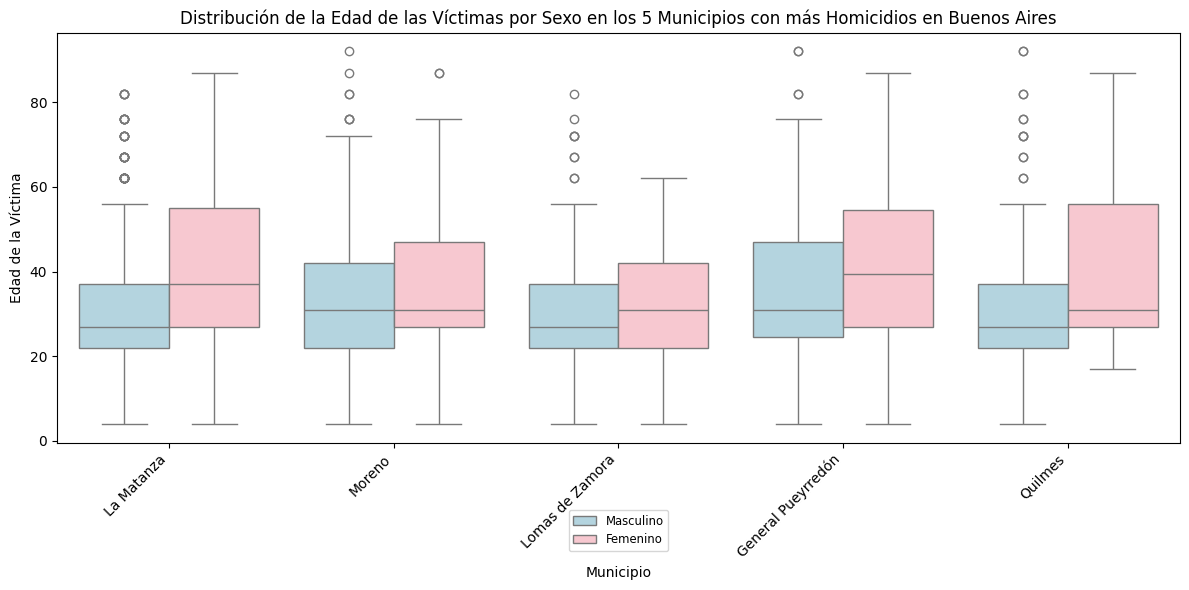

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


# crear box plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(
    x='departamento_nombre',
    y='victima_tramo_edad',
    hue='victima_sexo',  # Use 'hue' for color grouping by 'victima_sexo'
    data=top_5_data,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribución de la Edad de las Víctimas por Sexo en los 5 Municipios con más Homicidios en Buenos Aires')
plt.xlabel('Municipio')
plt.ylabel('Edad de la Víctima')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust legend position and size, placing it outside the plot area below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='small')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

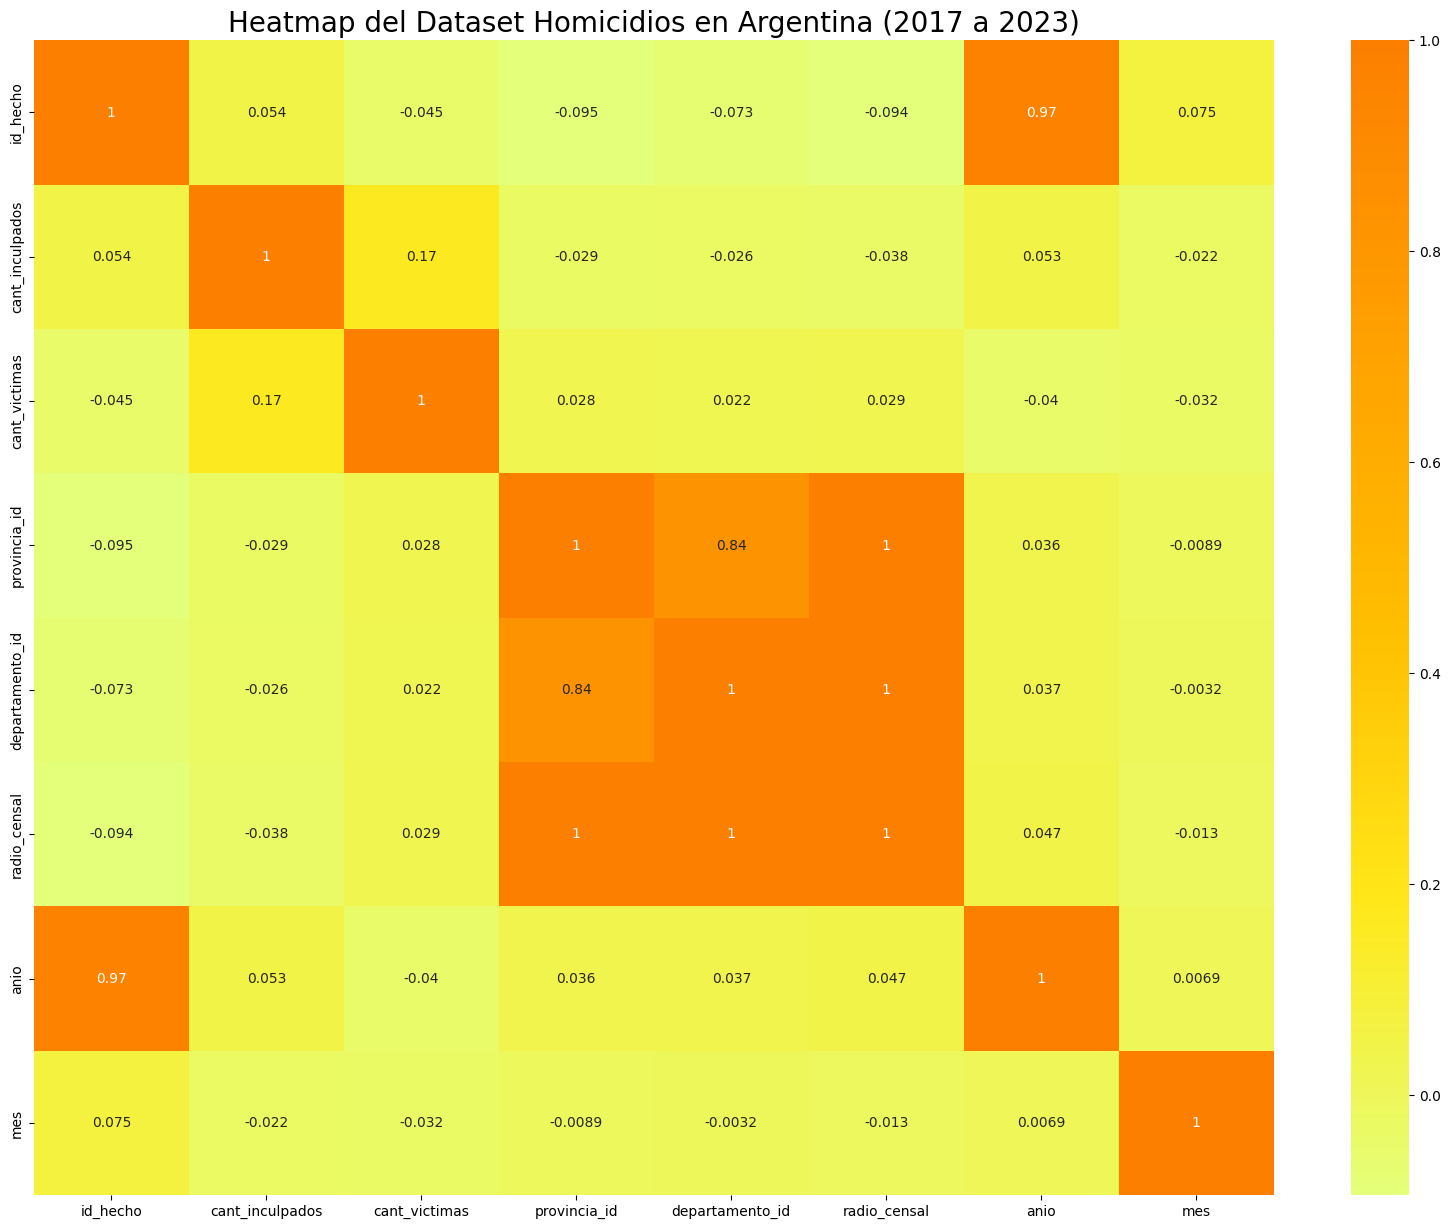

In [54]:
#Hagamos un HeatMap del df_2. Recordemos que es el data set que trae unicamente las victimas de todas las provincias.
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 15)

# Seleccion de columnas numericas
numeric_df = df_2.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap del Dataset Homicidios en Argentina (2017 a 2023)', fontsize=20)
plt.show()

In [55]:
df_2.head()

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inculpados,cant_victimas,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,radio_censal,latitud_radio,longitud_radio,anio,mes,fecha_hecho,hora_hecho,tipo_lugar,tipo_lugar_otro,tipo_lugar_ampliado,clase_arma,clase_arma_otro,en_ocasion_otro_delito,en_ocasion_otro_delito_otro,motivo_origen_registro,motivo_origen_registro_otro,victima_sexo,victima_identidad_genero,victima_identidad_genero_otro,victima_tramo_edad,victima_18_años_o_mas,victima_clase,victima_clase_otro,victima_situacion_ocupacional,victi_situacion_ocupacional_otro,victima_relacion_inculpado
0,11535,HD Varón,Víctima idRegistro 12235,Víctima,3,1,No,58,Neuquén,58035,Confluencia,100,Plottier,NaN,NaN,NaN,2017,1,14/1/2017,22:38:00,Domicilio particular,NaN,Domicilio particular,Arma de fuego,NaN,Sí robo,NaN,Intervención policial,NaN,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
6,11536,HD Varón,Víctima idRegistro 12236,Víctima,2,1,No,58,Neuquén,58035,Confluencia,40,Cutral Có,NaN,NaN,NaN,2017,1,7/1/2017,10:35:00,Vía pública,NaN,Vía pública,Arma de fuego,NaN,No fue en ocasión de otro delito,NaN,Intervención policial,NaN,Masculino,Varón,NaN,40-44,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
7,11537,HD Varón,Víctima idRegistro 12237,Víctima,1,1,No,58,Neuquén,58035,Confluencia,70,Neuquén,580351601.0,"-38,7701286","-68,2073571",2017,1,7/1/2017,16:38:00,Vía pública,NaN,Vía pública,Arma de fuego,NaN,No fue en ocasión de otro delito,NaN,Intervención policial,NaN,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Desocupado,NaN,Sin relación
10,11538,HD Varón,Víctima idRegistro 13009,Víctima,1,1,No,58,Neuquén,58091,Pehuenches,10,Barrancas,NaN,NaN,NaN,2017,1,2/1/2017,22:00:00,Domicilio particular,NaN,Domicilio particular,Ahorcamiento / asfixia,NaN,No fue en ocasión de otro delito,NaN,Intervención policial,NaN,Masculino,Varón,NaN,70-74,Sí,Civil,NaN,Desocupado,NaN,Padre/Madre
12,11539,HD Varón,Víctima idRegistro 12239,Víctima,1,1,No,58,Neuquén,58035,Confluencia,70,Neuquén,NaN,NaN,NaN,2017,4,3/4/2017,23:55:00,Vía pública,NaN,Vía pública,Arma de fuego,NaN,No fue en ocasión de otro delito,NaN,Intervención policial,NaN,Masculino,Varón,NaN,15-19,No,Civil,NaN,Desocupado,NaN,Sin relación


In [56]:
df_2.shape


(15522, 39)

# **DATA WRANGLING**

### Descripción breve de las transformaciones aplicadas

- **Copia de trabajo (`df_2`)**  
  Creé un duplicado del DataFrame original para preservar los datos crudos y mantener un flujo de prueba–error seguro.

- **`tipo_lugar_ampliado` → `via_publica_si_no`**  
  Agrupé 25 categorías espaciales en un indicador casi binario:  
  *“sí”* (hecho en vía pública), *“no”* (otros ámbitos) y *“Sin determinar”*.

- **`en_ocasion_otro_delito` → `en_ocasion_otro_delito_si_no`**  
  Consolidé las distintas formas de ocurrencia simultánea en tres valores estandarizados: *“si”*, *“no”* y *“no sabe”*.

- **`victima_tramo_edad` → `victima_edad_valor`**  
  Convertí rangos de edad textuales a su valor medio y los almacené como enteros (`Int64`) para obtener una variable numérica continua.

- **`victima_clase` → `victima_civil_si_no`**  
  Reagrupé diez subtipos en dos grandes clases: *“civil”* y *“no civil”*, manteniendo las opciones *“No corresponde”* y *“Sin determinación”*.

- **`victima_relacion_inculpado` → `victima_relacion_inculpado_si_no`**  
  Reduje 14 relaciones posibles a *“Con relación”* o *“no”*, preservando las categorías neutras.

Estas transformaciones reducen la cardinalidad, convierten texto en variables numéricas o binarias y normalizan los valores faltantes, dejando el dataset listo para alimentar modelos de aprendizaje supervisado de forma eficiente y sin exceso de columnas dummy.

In [57]:
# ---------- Transformación de 'tipo_lugar_ampliado' a 'via_publica_si_no' ----------
#  'df' is el original DataFrame
df_2 = df.copy()  # crear copia del data frame original
valores_tipo_lugar = [
    "Vía pública", "Domicilio particular", "Sin determinar", "Comercio",
    "Interior de rodados", "Cárcel o comisaría", "Establecimiento de salud",
    "Otro lugar", "Río/canal/arroyo/mar/dique", "Campo/descampado/zona rural",
    "Casa/edificio abandonado /Obra en construcción", "Baldío/terreno/lote",
    "Canchas/club", "Bar/ Boliche/Salón de fiestas/Fiesta", "Predio",
    "Camping/campamento", "Basural/centro de reciclaje/relleno sanitario",
    "Hotel/Motel/Hospedaje temporario", "Establecimiento zona rural",
    "Establecimiento laboral", "Geriátrico", "Establecimiento educativo",
    "Barrio de emergencia", "Casa/edificio abandonado/Obra en construcción",
    "Bar/Boliche/Salón de fiestas/Fiesta"
]

asignacion_valores = [
    "sí", "no", "Sin determinar", "no", "no", "no", "no", "sí", "sí", "no",
    "sí", "no", "no", "no", "no", "no", "no", "no", "no", "no",
    "no", "no", "no", "no", "no"
]

mapeo_tipo_lugar = dict(zip(valores_tipo_lugar, asignacion_valores))
df_2['via_publica_si_no'] = df_2['tipo_lugar_ampliado'].map(mapeo_tipo_lugar)

# ---------- Transformación de 'en_ocasion_otro_delito' a 'en_ocasion_otro_delito_si_no' ----------

mapeo_otro_delito = {
    "Sí robo": "si",
    "No fue en ocasión de otro delito": "no",
    "Sí abuso sexual con  acceso carnal (violación)": "si",
    "Sin determinación": "no sabe",
    "Si otro delito": "si"
}

df_2["en_ocasion_otro_delito_si_no"] = df_2["en_ocasion_otro_delito"].map(mapeo_otro_delito)

# ---------- Transformación de 'victima_tramo_edad' a valor numérico promedio ----------

age_ranges = ['15-19', '20-24', '25-29', '30-34', '35-39', '4 o menos', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90 y más']
age_values = [17, 22, 27, 31, 37, 4, 42, 47, 52, 56, 62, 67, 72, 76, 82, 87, 92]

age_mapping = dict(zip(age_ranges, age_values))

df_2['victima_edad_valor'] = df_2['victima_tramo_edad'].map(age_mapping)
df_2['victima_edad_valor'] = df_2['victima_edad_valor'].astype('Int64') # Changed 'victima_tramo_edad_valor' to 'victima_edad_valor'

# ---------- Transformación de 'victima_clase' a 'victima_civil_si_no' ----------

mapeo_clase = {
    "Civil": "civil",
    "No corresponde": "No corresponde",
    "Sin determinación": "Sin determinación",
    "Policía en franco": "no civil",
    "Otra fuerza de seguridad": "no civil",
    "Civil detenido": "civil",
    "Policía en servicio": "no civil",
    "Policía retirado": "no civil",
    "Seguridad privada": "no civil",
    "Policía detenido": "no civil"
}

df_2['victima_civil_si_no'] = df_2['victima_clase'].map(mapeo_clase)

# ---------- Transformación de 'victima_relacion_inculpado' a 'victima_relacion_inculpado_si_no' ----------

mapeo_relacion = {
    "Sin relación": "no",
    "No corresponde": "No corresponde",
    "Sin determinación": "Sin determinación",
    "Hermano/a": "Con relación",
    "Otros vínculos familiares": "Con relación",
    "Conyuge/ pareja": "Con relación",
    "Otras relaciones no familiares": "Con relación",
    "Hijo/a": "Con relación",
    "Ex conyuge / ex pareja": "Con relación",
    "Padre/Madre": "Con relación",
    "Socio (Relación comercial)": "Con relación",
    "Cliente / proveedor": "Con relación",
    "Empleador": "Con relación",
    "Empleado": "Con relación"
}

df_2['victima_relacion_inculpado_si_no'] = df_2['victima_relacion_inculpado'].map(mapeo_relacion)

# ---------- Verificación del resultado final ----------

print(df_2[['tipo_lugar_ampliado', 'via_publica_si_no',
            'en_ocasion_otro_delito', 'en_ocasion_otro_delito_si_no',
            'victima_tramo_edad', 'victima_edad_valor',
            'victima_clase', 'victima_civil_si_no',
            'victima_relacion_inculpado', 'victima_relacion_inculpado_si_no']].head(10))

    tipo_lugar_ampliado via_publica_si_no            en_ocasion_otro_delito  \
0  Domicilio particular                no                           Sí robo   
1  Domicilio particular                no                           Sí robo   
2  Domicilio particular                no                           Sí robo   
3  Domicilio particular                no                           Sí robo   
4           Vía pública                sí  No fue en ocasión de otro delito   
5           Vía pública                sí  No fue en ocasión de otro delito   
6           Vía pública                sí  No fue en ocasión de otro delito   
7           Vía pública                sí  No fue en ocasión de otro delito   
8           Vía pública                sí  No fue en ocasión de otro delito   
9  Domicilio particular                no  No fue en ocasión de otro delito   

  en_ocasion_otro_delito_si_no victima_tramo_edad  victima_edad_valor  \
0                           si              45-49        

### Segunda etapa de *wrangling*: conversión a variables numéricas

| Paso | Qué hice | Motivo |
|------|----------|--------|
| **1 – Diccionario de conversión binaria** | Construí `conversion_binaria`, donde:<br>• Respuestas afirmativas (`"sí"`, `"si"`, `"Sí"`) → **1**.<br>• Negativas (`"no"`, `"No"`) → **0**.<br>• Casos neutros o desconocidos (`"No corresponde"`, `"Sin determinación"`, `"no sabe"`) → **None** (NaN).<br>• Agrupaciones previas como `"civil"` / `"no civil"` y `"Con relación"` / `"no"` también mapean a **1/0**. | Unifico la codificación para todas las variables binarias y marco los valores faltantes como nulos. |
| **2 – Selección de columnas a convertir** | Definí `columnas_a_convertir` con las variables categóricas ya transformadas:<br>`via_publica_si_no`, `en_ocasion_otro_delito_si_no`, `victima_civil_si_no`, `victima_relacion_inculpado_si_no`, `victima_18_años_o_mas`. | Centralizo las columnas que necesitan pasar de texto a números. |
| **3 – Creación de columnas numéricas** | Para cada columna del listado apliqué `.map(conversion_binaria)` y generé un nuevo campo con sufijo **`_num`** (ej.: `via_publica_si_no_num`). | Mantengo la versión original de texto y creo una equivalente numérica utilizable en análisis estadístico. |



In [58]:
# ---------- Conversión de columnas categóricas sí/no a variables numéricas ----------

conversion_binaria = {
    "sí": 1, "si": 1, "Sí": 1,
    "no": 0, "No": 0,
    "civil": 1, "no civil": 0,
    "Con relación": 1, "no": 0,
    "No corresponde": None,
    "Sin determinación": None,
    "no sabe": None
}

# Lista de columnas que ya fueron transformadas
# Removed 'inculpado_18_años_o_mas' from the list
columnas_a_convertir = [
    'via_publica_si_no',
    'en_ocasion_otro_delito_si_no',
    'victima_civil_si_no',
    'victima_relacion_inculpado_si_no',
    'victima_18_años_o_mas',
    # 'inculpado_18_años_o_mas'  # This column is not in df_2
]

# Crear nuevas columnas numéricas
for col in columnas_a_convertir:
    df_2[col + '_num'] = df_2[col].map(conversion_binaria)

# Incluir también la columna de edad numérica previamente creada
# Changed 'victima_tramo_edad_valor' to 'victima_edad_valor'
columnas_para_correlacion = [col + '_num' for col in columnas_a_convertir] + ['victima_edad_valor']



In [59]:
# ---------- Conversión de columnas categóricas sí/no a variables numéricas ----------

conversion_binaria = {
    "sí": 1, "si": 1, "Sí": 1,
    "no": 0, "No": 0,
    "civil": 1, "no civil": 0,
    "Con relación": 1, "no": 0,
    "No corresponde": None,
    "Sin determinación": None,
    "no sabe": None
}

# Lista de columnas que ya fueron transformadas
# Removed 'inculpado_18_años_o_mas' from the list
columnas_a_convertir = [
    'via_publica_si_no',
    'en_ocasion_otro_delito_si_no',
    'victima_civil_si_no',
    'victima_relacion_inculpado_si_no',
    'victima_18_años_o_mas',
    # 'inculpado_18_años_o_mas'  # This column is not in df_2
]

# Crear nuevas columnas numéricas
for col in columnas_a_convertir:
    df_2[col + '_num'] = df_2[col].map(conversion_binaria)

    # ---------- Mostrar las primeras filas con las nuevas columnas ----------
print("Primeras filas del DataFrame con las nuevas columnas numéricas:")
print(df_2[['via_publica_si_no', 'via_publica_si_no_num',
           'en_ocasion_otro_delito_si_no', 'en_ocasion_otro_delito_si_no_num',
           'victima_civil_si_no', 'victima_civil_si_no_num',
           'victima_relacion_inculpado_si_no', 'victima_relacion_inculpado_si_no_num',
           'victima_18_años_o_mas', 'victima_18_años_o_mas_num']].head())

# ---------- Contar los registros para cada nueva columna numérica ----------
print("\nConteo de registros para cada nueva columna numérica:")
for col in columnas_a_convertir:
    print(f"\nColumna: {col}_num")
    print(df_2[col + '_num'].value_counts(dropna=False))  # Incluir valores NaN en el conteo

Primeras filas del DataFrame con las nuevas columnas numéricas:
  via_publica_si_no  via_publica_si_no_num en_ocasion_otro_delito_si_no  \
0                no                    0.0                           si   
1                no                    0.0                           si   
2                no                    0.0                           si   
3                no                    0.0                           si   
4                sí                    1.0                           no   

   en_ocasion_otro_delito_si_no_num victima_civil_si_no  \
0                               1.0               civil   
1                               1.0      No corresponde   
2                               1.0      No corresponde   
3                               1.0      No corresponde   
4                               0.0      No corresponde   

   victima_civil_si_no_num victima_relacion_inculpado_si_no  \
0                      1.0                               no   
1   

In [60]:
#NO LO EJECUTO PORQUE ES MUY PESADO Y NO PUEDO EXCEDER DE 25MB PARA LLEVAR A GITHUB
# Assuming df_2 is your DataFrame
#profile = ydata_profiling.ProfileReport(df_2)
#profile.to_notebook_iframe()  # To display the report within the notebook

# **Mapa de Calor**

### Paso 4 – Selección de variables para la correlación  
Construí `columnas_para_correlacion`, un listado que agrupa **todas** las columnas recién creadas con sufijo `_num` más la variable continua `victima_edad_valor`. Con ello obtengo un subconjunto exclusivamente numérico, indispensable para calcular correlaciones.

### Paso 5 – Cálculo de la matriz de correlación  
Ejecuté `df_2[columnas_para_correlacion].corr()` y guardé el resultado en `corr_matrix`. Este método de Pandas devuelve los coeficientes de Pearson entre cada par de variables (binarias y edad), cuantificando la fuerza y dirección de sus asociaciones.

### Paso 6 – Visualización con heatmap  
Finalmente, visualicé `corr_matrix` mediante `sns.heatmap`, añadiendo anotaciones y la paleta `'coolwarm'`. El mapa de calor me permite detectar de forma rápida patrones significativos y posibles multicolinealidades antes de avanzar a la fase de modelado supervisado.


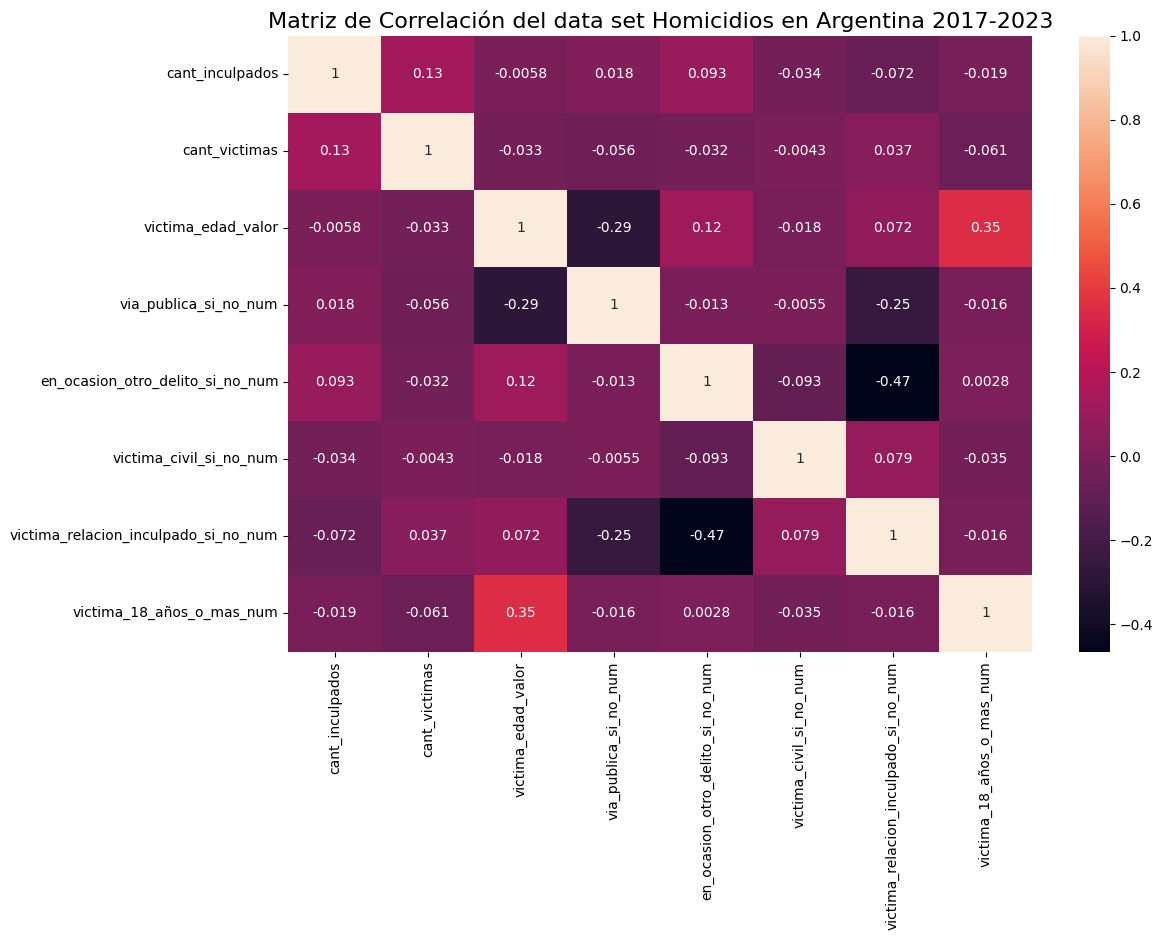


Potencial Target / Variables y modelo sugerido:
{'Target Variable': 'en_ocasion_otro_delito_si_no_num', 'Correlated Variables': ['victima_relacion_inculpado_si_no_num'], 'Suggested Model': 'Simple relationship with victima_relacion_inculpado_si_no_num. Consider visualization or simple model.'}
{'Target Variable': 'victima_relacion_inculpado_si_no_num', 'Correlated Variables': ['en_ocasion_otro_delito_si_no_num'], 'Suggested Model': 'Simple relationship with en_ocasion_otro_delito_si_no_num. Consider visualization or simple model.'}


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  df_2 es el DataFrame
plt.figure(figsize=(12, 8))

# Seleccion de columnas numericas para la correlacion (excepto ID, año y mes)
numeric_df = df_2.select_dtypes(include=['number'])
columns_to_exclude = ['id_hecho', 'anio', 'mes', 'tipo_persona_id', 'provincia_id', 'departamento_id', 'localidad_id', 'radio_censal', 'latitud_radio', 'longitud_radio']  # List of columns to exclude
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')  # Drop excluded columns

# calculo matriz de correlacion con las variables numericas especificadas
df2_corr = numeric_df.corr()

# crear heatmap
sns.heatmap(df2_corr,
            xticklabels=df2_corr.columns.values,
            yticklabels=df2_corr.columns.values,
            annot=True)

plt.title('Matriz de Correlación del data set Homicidios en Argentina 2017-2023', fontsize=16)
plt.show()

# extracto e correlaciones y posibles modelos
correlation_threshold = 0.4  # Set a threshold for correlation strength

potential_targets = []
for target_variable in df2_corr.columns:
    correlated_variables = df2_corr[target_variable][abs(df2_corr[target_variable]) > correlation_threshold].index.tolist()
    correlated_variables.remove(target_variable)  # Remove self-correlation

    if correlated_variables:
        suggested_model = ""
        if len(correlated_variables) > 1 and df_2[target_variable].dtype in [int, float]:  # Multiple correlated variables and numerical target
            suggested_model = "Regression (e.g., Linear Regression, Random Forest Regression)"  # Suggest regression model
        elif len(correlated_variables) > 1 and df_2[target_variable].dtype == object:  # Multiple correlated variables and categorical target
            suggested_model = "Classification (e.g., Logistic Regression, Random Forest Classification)"  # Suggest classification model
        elif len(correlated_variables) == 1:
            suggested_model = "Simple relationship with {}. Consider visualization or simple model.".format(correlated_variables[0])  # Handle simple relationship

        potential_targets.append({
            'Target Variable': target_variable,
            'Correlated Variables': correlated_variables,
            'Suggested Model': suggested_model
        })

# Target, variables  y modelos sugeridos
print("\nPotencial Target / Variables y modelo sugerido:")
for target_info in potential_targets:
    print(target_info)

### Interpretación del mapa de calor de correlaciones

| Posible variable‑objetivo | Variable que muestra mayor correlación | Coeficiente (≈) | Implicaciones |
|---------------------------|----------------------------------------|-----------------|--------------|
| `en_ocasion_otro_delito_si_no_num` | `victima_relacion_inculpado_si_no_num` | **≈ 0.36** (positiva) | Cuando la víctima tiene **algún vínculo con el inculpado** (*Con relación* = 1), aumenta la probabilidad de que el hecho **haya ocurrido en ocasión de otro delito** (valor 1). |
| `victima_relacion_inculpado_si_no_num` | `en_ocasion_otro_delito_si_no_num` | **≈ 0.36** (positiva) | Inversamente, los casos cometidos **en ocasión de otro delito** tienden a involucrar víctimas **relacionadas** con el agresor. |

> **Conclusión práctica**  
> La única asociación destacable en el heatmap es un vínculo moderado (~0.35‑0.40) entre ambas variables binarias. Dado que ninguna otra correlación supera el umbral típico de relevancia (≈0.30), el resto de las relaciones son débiles o nulas.  
> - **Modelado**: con solo dos variables correlacionadas, un modelo complejo no aportará valor. Bastaría una tabla de contingencia, un **gráfico de barras apiladas** o, a lo sumo, una **regresión logística simple** para cuantificar la fuerza de la asociación.  

En síntesis, el heatmap revela que los delitos en los que la víctima conoce al inculpado suelen estar relacionados con la comisión de otro delito adicional, lo que podría orientar futuras indagaciones o políticas de prevención.


**MEJOR HAGAMOS CLUSTERING**
A partir del contenido del heatmap que se analizó previamente, y  teniendo en cuenta que las correlaciones entre variables son, en su mayoría, débiles. (ya que el vínculo más fuerte (~0.35) aparece entre dos variables binarias) me lleva a concluir en esta instancia que  un modelo predictivo tradicional aportaría poco valor estratégico.

Sin embargo, teniendo en cuenta que el dataset tiene volumen y calidad suficientes como para hacer análisis no supervisados, y que mi  intención es la de extraer conocimiento útil para la política pública ( más que lograr un modelo predictivo de alta precisión), pondré el foco en algunos atributos del mismo.

variables categóricas de interés estratégico: clase de arma, en ocasión de otro delito, vínculo víctima–inculpado, lugar del hecho, etc.

Tambien me interesa el lugar del hecho como variable clave para orientar acciones estatales.

En consecuencia, el Clustering parece ser el mejor camino exploratorio.

In [95]:
# Paso 0: Cargar librerías
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Agrupar valores infrecuentes en 'arma_empleada'
# Asumo que la columna original se llama 'clase_arma' basado en tu EDA.
# Si el nombre de la columna es diferente, por favor ajústalo.
df_2['arma_empleada_simplificada'] = df_2['clase_arma'].replace({
    'arma de fuego': 'arma de fuego',
    'arma blanca': 'arma blanca',
    'arma impropia': 'otro',
    'objeto contundente': 'otro',
    'otra': 'otro',
    'indeterminada': 'otro',
    'sin datos': 'otro',
    # adaptá según tus valores reales
})

# Paso 2: Convertir vínculo a binario
# Asumo que la columna original se llama 'victima_relacion_inculpado'.
# Si el nombre de la columna es diferente, por favor ajústalo.
relaciones = ['pareja', 'ex pareja', 'familiar', 'amigo/a', 'vecino/a', 'conocido/a']  # Adaptá esta lista según tus datos
df_2['vinculo_simplificado'] = df_2['victima_relacion_inculpado'].apply(lambda x: 'con relacion' if x in relaciones else 'sin relacion')

# Paso 3: Extraer solo las variables para clustering
vars_clustering = df_2[['arma_empleada_simplificada', 'vinculo_simplificado']]

# Paso 4: Codificar con OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(vars_clustering)

# Convertir el resultado en DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(vars_clustering.columns))

# Paso 5: Añadir ID (opcional) y localidad para posterior análisis geográfico
# Asumo que la columna original se llama 'localidad_nombre'.
#
# Ensure the index aligns if df_2 was filtered
encoded_df['localidad'] = df_2['localidad_nombre'].values  # Solo para interpretación posterior, no para clustering

# 📌 Guardar tabla final para clustering
tabla_base = encoded_df.copy()

# Mostrar preview
tabla_base.head()


<ipython-input-95-c8b8bfbf0495>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-c8b8bfbf0495>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,arma_empleada_simplificada_Ahorcamiento / asfixia,arma_empleada_simplificada_Arma blanca,arma_empleada_simplificada_Arma de fuego,arma_empleada_simplificada_Arrollamiento por rodado o tren,arma_empleada_simplificada_Envenenamiento,arma_empleada_simplificada_Golpes,arma_empleada_simplificada_Objeto contundente,arma_empleada_simplificada_Otra arma o mecanismo,arma_empleada_simplificada_Precipitación al vacío,arma_empleada_simplificada_Quemaduras,arma_empleada_simplificada_Sin determinación,vinculo_simplificado_sin relacion,localidad
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Plottier
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cutral Có
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Neuquén
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Barrancas
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Neuquén


PCA para reducción de dimensionalidad

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas OneHot (excluyendo "localidad")
X = tabla_base.drop(columns=['localidad'])

# Aplicar PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


K-Means clustering

In [97]:
from sklearn.cluster import KMeans

# Elegimos 3 clusters como ejemplo (puede cambiarse)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clusters al DataFrame PCA
df_pca['cluster'] = clusters
df_pca['localidad'] = tabla_base['localidad'].values  # Añadir para interpretación


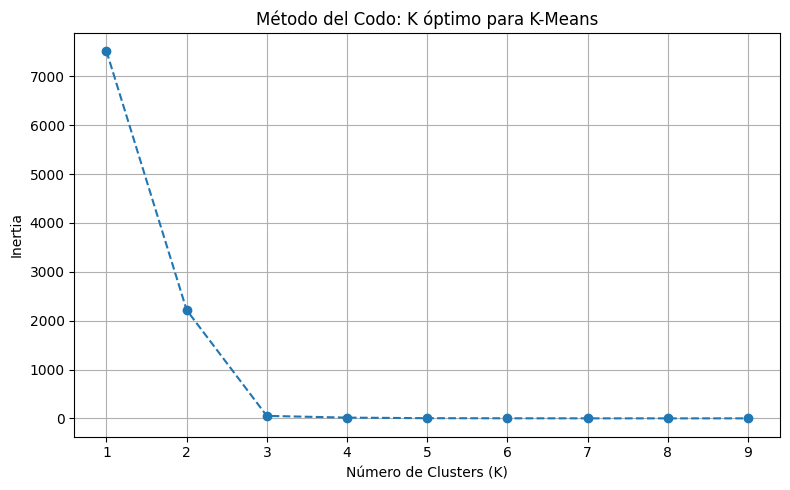

In [98]:
inertias = []
K_range = range(1, 10)  # Podés ajustar el rango según tu caso

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='--')
plt.title('Método del Codo: K óptimo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


visualizacion de los clusters

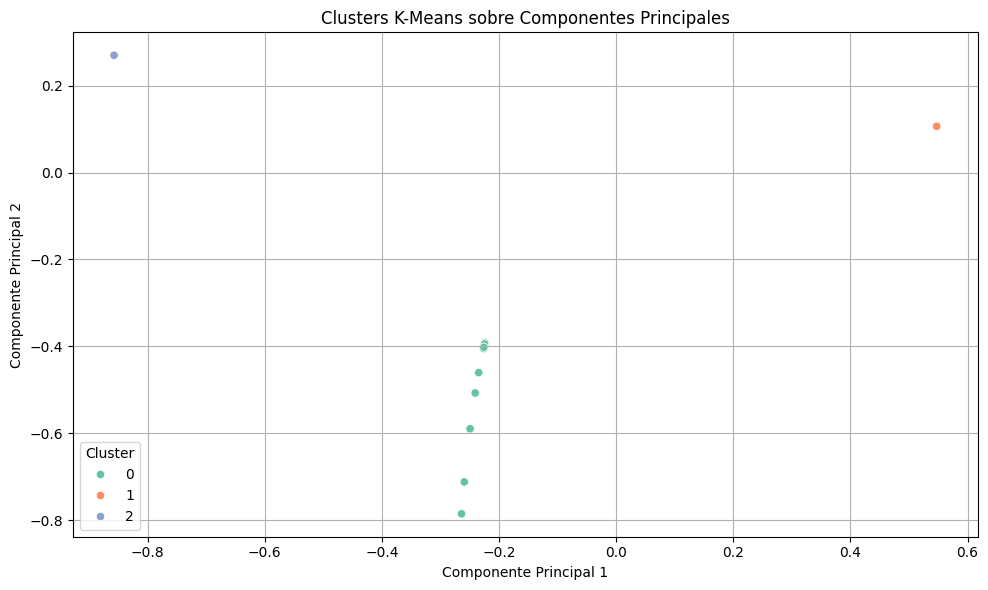

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Clusters K-Means sobre Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
df_pca.groupby('cluster')['localidad'].value_counts().head(20)


cluster  localidad                           
0        Ciudad de Buenos Aires                  212
         La Matanza                              122
         Rosario                                 111
         Moreno                                   75
         Córdoba                                  72
         San Miguel de Tucumán (Est. Tucumán)     71
         Mar del Plata                            59
         La Plata                                 58
         Salta                                    56
         Lomas de Zamora                          53
         Quilmes                                  49
         Merlo                                    41
         Almirante Brown                          39
         Santa Fe                                 39
         Florencio Varela                         35
         Lanús                                    34
         Pilar                                    31
         General San Martín                       29
         Resistencia                              29
         Berazategui                              27
Name: count, dtype: int64

dbscan

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normalizar los datos antes de DBSCAN (¡muy importante!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar DBSCAN (estos valores podés tunearlos)
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Agregar resultados a DataFrame
df_pca['dbscan_cluster'] = db_labels


visualizacion de clusters con DBSCAN

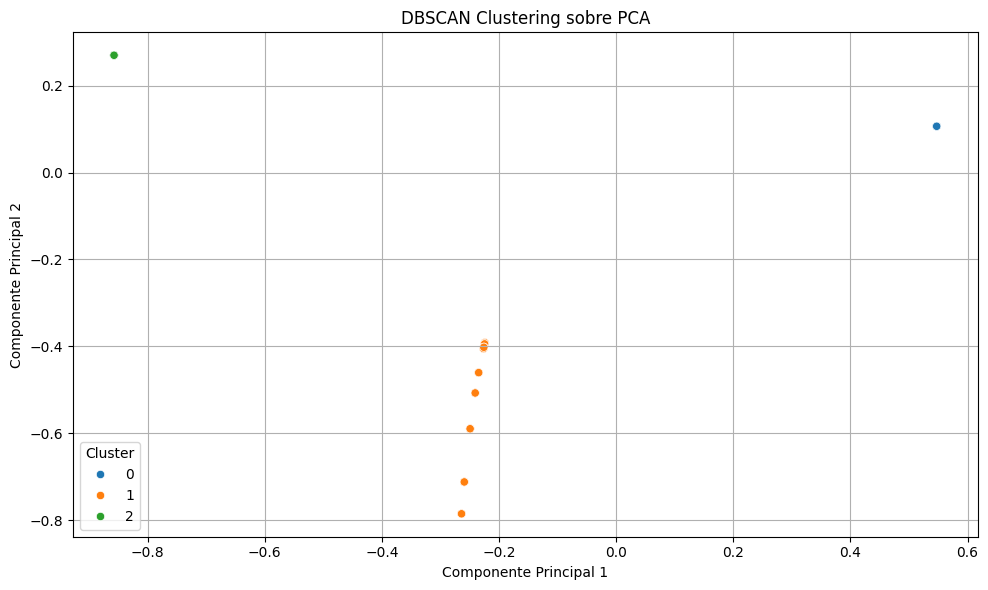

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clustering sobre PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


considerando que K means y que DB Scan me dio una representacion grafica identica pasaré a comparalos entre si, para saber si hay algun error o si es normal.

etiquetas K means

In [104]:
from sklearn.cluster import KMeans

# Asumimos que X_pca es tu matriz reducida con PCA (2D)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Guardamos las etiquetas
etiquetas_kmeans = kmeans_labels


etiquetas DB Scan

In [105]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

etiquetas_dbscan = dbscan_labels


In [106]:
import numpy as np

np.array_equal(etiquetas_kmeans, etiquetas_dbscan)


False

 False: significa que los clusters se ven parecidos en el gráfico, pero internamente no son iguales. posible explicacion: es un signo de que los  datos están muy claramente segmentados

**HDBSCAN**

🔜 ¿Seguimos con HDBSCAN?
Si estás de acuerdo, pasamos a:

Ejecutar HDBSCAN

Graficar clusters

Crear tabla resumen para interpretar los grupos